In [17]:
print(chr(sum(range(ord(min(str(not())))))))

ඞ


In [18]:
import networkx as nx
import scipy.io
import numpy as np
import tarfile
import requests
import random
import matplotlib as plt
from collections import Counter
import os
import pandas as pd
# Set the seed for reproducibility
seed_value = 42

Networks used by old paper

In [19]:
# Function to read .mtx files (both weighted and unweighted) and create a graph
def read_mtx_file(file_path, weighted=True):
    G = nx.Graph()  # or nx.DiGraph() if the graph is directed
    
    with open(file_path, 'r') as f:
        lines = f.readlines()
        
    # Skip header lines that start with '%%' (Matrix Market metadata)
    matrix_data = [line for line in lines if not line.startswith('%%') and line.strip()]
    
    # Read the edges from the matrix data and add them to the graph
    for line in matrix_data:
        try:
            # Split the line into components
            parts = line.split()
            u, v = int(parts[0]), int(parts[1])  # Convert nodes to integers
            
            if weighted:
                # If the graph is weighted, assume the third element is the weight
                weight = float(parts[2])
                G.add_edge(u, v, weight=weight)
            else:
                # If unweighted, just add the edge without weight
                G.add_edge(u, v)
        except ValueError:
            print(f"Skipping invalid line: {line.strip()}")
    
    return G

In [20]:
def statistics(G):
    print(f'Number of nodes: {G.number_of_nodes()}')
    print(f'Number of edges: {G.number_of_edges()}')

    # Density
    density = nx.density(G)
    print("The density of the graph is: ",density)

    # average clustering coefficient
    # Calculate the local clustering coefficient for each node
    CC = nx.clustering(G)
    # Calculate the average clustering coefficient
    ACC = sum(CC.values()) / len(CC)
    print(f"Average Clustering Coefficient is: {ACC}")

In [21]:
# Function to calculate betweenness centrality and save to a folder
def calculate_and_save_betweenness(G, graph_name, output_folder='BetweennessCentrality'):
    # Calculate betweenness centrality
    betweenness = nx.betweenness_centrality(G)
    
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Create a unique file name based on the graph name
    file_path = os.path.join(output_folder, f'betweenness_centrality_{graph_name}.txt')
    
    # Save betweenness centrality to a text file
    with open(file_path, 'w') as f:
        f.write("Node\tBetweennessCentrality\n")  # Write header
        for node, centrality in betweenness.items():
            f.write(f"{node}\t{centrality}\n")
    
    print(f"Betweenness centrality saved to {file_path}")

In [22]:
G = nx.read_graphml("GraphsNetworkX/Test1.graphml")
print(nx.edges(G))
print(G.degree('15'))
statistics(G)
calculate_and_save_betweenness(G, 'Test1')

FileNotFoundError: [Errno 2] No such file or directory: 'GraphsNetworkX/Test1.graphml'

Rand

In [ ]:
# Parameters for Erdos-Renyi graph
n = 2000  # Number of vertices
m = 7980  # Number of edges

# Generate Erdos-Renyi random graph
G = nx.gnm_random_graph(n, m, seed=seed_value)
nx.write_graphml(G, "GraphsNetworkX/Rand.graphml")
G = nx.read_graphml("GraphsNetworkX/Rand.graphml")

In [ ]:
statistics(G)

Number of nodes: 2000
Number of edges: 7980
The density of the graph is:  0.003991995997998999
Average Clustering Coefficient is: 0.004036149879532232


In [ ]:
calculate_and_save_betweenness(G, 'Rand')

Betweenness centrality saved to BetweennessCentrality\betweenness_centrality_Rand.txt


Pref-attach

In [ ]:
# pref-attach
# Parameters: number of nodes (2000) and edges to attach per new node 
n_nodes = 2000  # number of nodes
# needs an into so the num of edges cant be 7980 exactly
m_edges = 4     # number of edges to attach per new node

# Generate the graph using the Preferential Attachment model
G = nx.barabasi_albert_graph(n_nodes, m_edges, seed=seed_value)
# Save the graph to a GraphML file
nx.write_graphml(G, "GraphsNetworkX/Pref-attach.graphml")
G = nx.read_graphml("GraphsNetworkX/Pref-attach.graphml")

In [ ]:
statistics(G)

Number of nodes: 2000
Number of edges: 7984
The density of the graph is:  0.00399399699849925
Average Clustering Coefficient is: 0.019885923481658265


In [ ]:
calculate_and_save_betweenness(G, 'Pref-attach')

Betweenness centrality saved to BetweennessCentrality\betweenness_centrality_Pref-attach.txt


Bio-pin

In [ ]:
# TODO import bio pin als ie bestaat

Crawl

In [ ]:
# IMPORTANT: Run only once and edit the header of the file

# Extract the contents of the tar.gz file
with tarfile.open('OriginalGraphs/wb-cs-stanford.tar.gz', 'r:gz') as tar:
    tar.extractall(path='output_directory')

In [ ]:
# Load the graph
file_path = 'output_directory/wb-cs-stanford/wb-cs-stanford.mtx'
G = read_mtx_file(file_path, weighted=False)
nx.write_graphml(G, "GraphsNetworkX/Crawl.graphml")
G = nx.read_graphml("GraphsNetworkX/Crawl.graphml")

In [ ]:
statistics(G)

Number of nodes: 9435
Number of edges: 28726
The density of the graph is:  0.0006454570896077836
Average Clustering Coefficient is: 0.37014259070785793


In [ ]:
calculate_and_save_betweenness(G, 'Crawl')

Betweenness centrality saved to BetweennessCentrality\betweenness_centrality_Crawl.txt


Cite

In [ ]:
# IMPORTANT: Run only once and edit the header of the file

# Extract the contents of the tar.gz file
with tarfile.open('OriginalGraphs/lederberg.tar.gz', 'r:gz') as tar:
    tar.extractall(path='output_directory')

In [ ]:
# Load the graph
file_path = 'output_directory/Lederberg/Lederberg.mtx'
G = read_mtx_file(file_path, weighted=True)
nx.write_graphml(G, "GraphsNetworkX/Cite.graphml")
G = nx.read_graphml("GraphsNetworkX/Cite.graphml")

Skipping invalid line: %-------------------------------------------------------------------------------
Skipping invalid line: % UF Sparse Matrix Collection, Tim Davis
Skipping invalid line: % http://www.cise.ufl.edu/research/sparse/matrices/Pajek/Lederberg
Skipping invalid line: % name: Pajek/Lederberg
Skipping invalid line: % [Pajek network: Lederberg citation network]
Skipping invalid line: % id: 1508
Skipping invalid line: % date: 2002
Skipping invalid line: % author: E. Garfield
Skipping invalid line: % ed: V. Batagelj
Skipping invalid line: % fields: name title A id kind notes aux date author ed
Skipping invalid line: % aux: pubyear gcs nodename
Skipping invalid line: % kind: directed multigraph
Skipping invalid line: %-------------------------------------------------------------------------------
Skipping invalid line: % notes:
Skipping invalid line: % ------------------------------------------------------------------------------
Skipping invalid line: % Pajek network converted 

In [ ]:
statistics(G)

Number of nodes: 8324
Number of edges: 41539
The density of the graph is:  0.0011991515322344252
Average Clustering Coefficient is: 0.31436910784645994


In [ ]:
calculate_and_save_betweenness(G, 'Cite')

Betweenness centrality saved to BetweennessCentrality\betweenness_centrality_Cite.txt


Road

In [ ]:
# IMPORTANT: Run only once and edit the header of the file
url = "http://www.diag.uniroma1.it/~challenge9/data/rome/rome99.gr"
response = requests.get(url)

with open("OriginalGraphs/rome99.gr", "wb") as f:
    f.write(response.content)

In [ ]:
# Define the file path (replace with the actual path to your file)
file_path = "OriginalGraphs/rome99.gr"

# Create an empty graph (you can choose directed or undirected based on your dataset)
G = nx.Graph()  # Use nx.DiGraph() for directed graphs

# Open the file and read line by line
with open(file_path, 'r') as f:
    for line in f:
        # Skip empty lines or comment lines
        if line.strip() and not line.startswith("#"):
            parts = line.split()
            
            # Check if the line starts with a non-numeric character ('a') and remove it
            if parts[0] == 'a':
                parts = parts[1:]  # Remove the first part (non-numeric 'a')
            
            if len(parts) != 3:  # Ensure the line has exactly 3 parts
                continue  # Skip malformed lines

            try:
                # Try to convert vertex1, vertex2 to integers and weight to a float
                vertex1 = int(parts[0])
                vertex2 = int(parts[1])
                weight = float(parts[2])  # Adjust type if weights are integers
                
                # Add the edge to the graph
                G.add_edge(vertex1, vertex2, weight=weight)
            except ValueError:
                # Skip lines where conversion fails (e.g., non-numeric data)
                continue

nx.write_graphml(G, "GraphsNetworkX/Road.graphml")
G = nx.read_graphml("GraphsNetworkX/Road.graphml")

In [ ]:
statistics(G)

Number of nodes: 3353
Number of edges: 4831
The density of the graph is:  0.0008596654440471861
Average Clustering Coefficient is: 0.03027139874739033


In [ ]:
calculate_and_save_betweenness(G, 'Road')

Betweenness centrality saved to BetweennessCentrality\betweenness_centrality_Road.txt


New Networks

Amazon

In [ ]:
# Load the graph from the gzipped file
file_path = "NewGraphs/amazon0302.txt.gz"
G = nx.read_edgelist(file_path)
nx.write_graphml(G, "GraphsNetworkX/Amazon.graphml")
G = nx.read_graphml("GraphsNetworkX/Amazon.graphml")
statistics(G)

Number of nodes: 262111
Number of edges: 899792
The density of the graph is:  2.6194088195261075e-05
Average Clustering Coefficient is: 0.419780014607673


In [ ]:
calculate_and_save_betweenness(G, 'Amazon')

Bio-CE

In [ ]:
# Load the weighted graph from the edge list file
file_path = "NewGraphs/bio-CE-CX.edges"
G = nx.read_edgelist(file_path, nodetype=int, data=(('weight', float),))
nx.write_graphml(G, "GraphsNetworkX/BioCE.graphml")
G = nx.read_graphml("GraphsNetworkX/BioCE.graphml")
statistics(G)

Number of nodes: 15229
Number of edges: 245952
The density of the graph is:  0.0021211242020364595
Average Clustering Coefficient is: 0.21116502730743858


In [ ]:
calculate_and_save_betweenness(G, 'BIO-CE')

Musea Facebook

In [ ]:
# Load the graph from the CSV edge list file (assuming the file has two columns: source and target nodes)
file_path = "NewGraphs/musae_facebook_edges.csv"
G= nx.read_edgelist(file_path, delimiter=',', nodetype=int)
nx.write_graphml(G, "GraphsNetworkX/museaFB.graphml")
G = nx.read_graphml("GraphsNetworkX/museaFB.graphml")
statistics(G)

Number of nodes: 22470
Number of edges: 171002
The density of the graph is:  0.000677398715568023
Average Clustering Coefficient is: 0.3597383824426942


In [ ]:
calculate_and_save_betweenness(G, 'MuseaFacebook')

Wiki Vote

In [ ]:
# Load the graph from the gzipped file
file_path = "NewGraphs\wiki-Vote.txt.gz"
G = nx.read_edgelist(file_path)
nx.write_graphml(G, "GraphsNetworkX/WikiVote.graphml")
G = nx.read_graphml("GraphsNetworkX/WikiVote.graphml")
statistics(G)

Number of nodes: 7115
Number of edges: 100762
The density of the graph is:  0.003981420144693063
Average Clustering Coefficient is: 0.14089784589308738


In [ ]:
calculate_and_save_betweenness(G, 'WikiVote')

### Error testing

In [64]:
def generate_bc_dataset(graph_name, top_nodes_only=True):
    """
    Generate a dataset containing true BC values and results BC values for c = 2, 3, 4, 5.
    
    Args:
        graph_name (str): Name of the graph being analyzed.
        top_nodes_only (bool): Whether to include only the top 30 nodes or the entire dataset.
    
    Returns:
        list: A dataset with BC values for the specified graph.
    """
    def load_bc(file_path, is_results=False):
        """Load BC values from a file. If it's a results file, parse the specific structure."""
        bc_data = {}
        with open(file_path, 'r') as f:
            if is_results:
                # Skip metadata lines and the header
                for _ in range(3):
                    next(f)
            else:
                # Skip header in true BC file
                next(f)
            
            # Read the remaining lines
            for line in f:
                parts = line.strip().split('\t')
                # Skip empty or invalid lines
                if not parts or (is_results and len(parts) < 4):
                    continue
                try:
                    if is_results:
                        node, _, _, approx_bc, *_ = parts  # Extract Node and Approximated_BC
                    else:
                        node, approx_bc = parts  # Extract Node and True_BC
                    bc_data[node] = float(approx_bc)
                except ValueError:
                    # Skip lines with invalid data
                    continue
        return bc_data

    # Define file paths
    true_bc_file_path = os.path.join('BetweennessCentrality', f'betweenness_centrality_{graph_name}.txt')

    # Load true BC values
    true_bc = load_bc(true_bc_file_path)

    # Determine nodes to include in the dataset
    if top_nodes_only:
        selected_nodes = sorted(true_bc.items(), key=lambda item: item[1], reverse=True)[:30]
    else:
        selected_nodes = true_bc.items()

    # Initialize dataset with true BC values and add corresponding results BC values
    dataset = []
    for node, bc_value in selected_nodes:
        entry = {'Node': node, 'True BC': bc_value}

        # Use different file paths based on whether analyzing top 30 nodes or the full graph
        base_path = 'Results2' if top_nodes_only else 'Results'

        # Add BC values for c = 2, 3, 4, 5
        if base_path == 'Results2':
            for c in range(2, 6):
                results_file_path = os.path.join(base_path, f'Results_c{c}', f'{graph_name}_results_c{c}.txt')
                results_bc = load_bc(results_file_path, is_results=True)
                entry[f'C{c} Approximated BC'] = results_bc.get(node, None)  # Use None if node is not in the results file
            
            dataset.append(entry)
        else:
            for c in range(2, 6):
                results_file_path = os.path.join(base_path, f'Results_{c}', f'{graph_name}_results_c{c}.txt')
                results_bc = load_bc(results_file_path, is_results=True)
                entry[f'C{c} Approximated BC'] = results_bc.get(node, None)  # Use None if node is not in the results file
            
            dataset.append(entry)            
    
    return dataset



import matplotlib.pyplot as plt
import numpy as np

def plot_bc_dotplot(dataset):
    """
    Plot true BC values and approximated BC values for each node as a dot plot.
    
    Args:
        dataset (list): List of dictionaries containing BC values for nodes.
    """
    # Extract node names and BC values
    nodes = [entry['Node'] for entry in dataset]
    true_bc = [entry['True BC'] for entry in dataset]
    c2_bc = [entry['C2 Approximated BC'] for entry in dataset]
    c3_bc = [entry['C3 Approximated BC'] for entry in dataset]
    c4_bc = [entry['C4 Approximated BC'] for entry in dataset]
    c5_bc = [entry['C5 Approximated BC'] for entry in dataset]

    # Set up x-axis positions
    indices = np.arange(len(nodes))

    # Create the plot
    plt.figure(figsize=(16, 8))

    plt.scatter(indices, true_bc, label='True BC', color='blue', s=100, alpha=0.7)
    plt.scatter(indices, c2_bc, label='C2 Approximated BC', color='orange', s=100, alpha=0.7)
    plt.scatter(indices, c3_bc, label='C3 Approximated BC', color='green', s=100, alpha=0.7)
    plt.scatter(indices, c4_bc, label='C4 Approximated BC', color='red', s=100, alpha=0.7)
    plt.scatter(indices, c5_bc, label='C5 Approximated BC', color='purple', s=100, alpha=0.7)

    # Add labels, title, and legend
    plt.xlabel('Nodes', fontsize=14)
    plt.ylabel('Betweenness Centrality (BC)', fontsize=14)
    plt.title('True BC vs Approximated BC for Top Nodes (Dot Plot)', fontsize=16)
    plt.xticks(indices, nodes, rotation=45, ha='right', fontsize=10)
    plt.legend(fontsize=12)
    plt.tight_layout()

    # Show the plot
    plt.show()

def plot_approximated_bc_dotplot(dataset):
    """
    Plot approximated BC values (C2, C3, C4, C5) for each node as a dot plot.
    
    Args:
        dataset (list): List of dictionaries containing BC values for nodes.
    """
    # Extract node names and BC values
    nodes = [entry['Node'] for entry in dataset]
    c2_bc = [entry['C2 Approximated BC'] for entry in dataset]
    c3_bc = [entry['C3 Approximated BC'] for entry in dataset]
    c4_bc = [entry['C4 Approximated BC'] for entry in dataset]
    c5_bc = [entry['C5 Approximated BC'] for entry in dataset]

    # Set up x-axis positions
    indices = np.arange(len(nodes))

    # Create the plot
    plt.figure(figsize=(16, 8))

    plt.scatter(indices, c2_bc, label='C2 Approximated BC', color='orange', s=100, alpha=0.7)
    plt.scatter(indices, c3_bc, label='C3 Approximated BC', color='green', s=100, alpha=0.7)
    plt.scatter(indices, c4_bc, label='C4 Approximated BC', color='red', s=100, alpha=0.7)
    plt.scatter(indices, c5_bc, label='C5 Approximated BC', color='purple', s=100, alpha=0.7)

    # Add labels, title, and legend
    plt.xlabel('Nodes', fontsize=14)
    plt.ylabel('Betweenness Centrality (BC)', fontsize=14)
    plt.title('Approximated BC for Top Nodes (Dot Plot)', fontsize=16)
    plt.xticks(indices, nodes, rotation=45, ha='right', fontsize=10)
    plt.legend(fontsize=12)
    plt.tight_layout()

    # Show the plot
    plt.show()

def plot_error_percentage(dataset):
    """
    Plot the error percentage for approximated BC values (C2, C3, C4, C5) for each node as a dot plot.
    
    Args:
        dataset (list): List of dictionaries containing BC values for nodes.
    """
    # Extract node names and error percentages
    nodes = [entry['Node'] for entry in dataset]
    c2_error = [100 * abs(entry['C2 Approximated BC'] - entry['True BC']) / entry['True BC']
                if entry['True BC'] != 0 and entry['C2 Approximated BC'] is not None else None for entry in dataset]
    c3_error = [100 * abs(entry['C3 Approximated BC'] - entry['True BC']) / entry['True BC']
                if entry['True BC'] != 0 and entry['C3 Approximated BC'] is not None else None for entry in dataset]
    c4_error = [100 * abs(entry['C4 Approximated BC'] - entry['True BC']) / entry['True BC']
                if entry['True BC'] != 0 and entry['C4 Approximated BC'] is not None else None for entry in dataset]
    c5_error = [100 * abs(entry['C5 Approximated BC'] - entry['True BC']) / entry['True BC']
                if entry['True BC'] != 0 and entry['C5 Approximated BC'] is not None else None for entry in dataset]

    # Set up x-axis positions
    indices = np.arange(len(nodes))

    # Create the plot
    plt.figure(figsize=(16, 8))

    plt.scatter(indices, c2_error, label='C2 Error (%)', color='orange', s=100, alpha=0.7)
    plt.scatter(indices, c3_error, label='C3 Error (%)', color='green', s=100, alpha=0.7)
    plt.scatter(indices, c4_error, label='C4 Error (%)', color='red', s=100, alpha=0.7)
    plt.scatter(indices, c5_error, label='C5 Error (%)', color='purple', s=100, alpha=0.7)

    # Add labels, title, and legend
    plt.xlabel('Nodes', fontsize=14)
    plt.ylabel('Error Percentage (%)', fontsize=14)
    plt.title('Error Percentage for Approximated BC (Dot Plot)', fontsize=16)
    plt.xticks(indices, nodes, rotation=45, ha='right', fontsize=10)
    plt.legend(fontsize=12)
    plt.tight_layout()

    # Show the plot
    plt.show()

def plot_totalnodes_to_numssp_ratio(graph_name, dataset):
    """
    Plot the ratio of TotalNodes / NumSSP for each node.
    
    Args:
        graph_name (str): Name of the graph being analyzed.
        dataset (list): List of dictionaries containing BC values for nodes.
    """
    def load_totalnodes_and_numssp(file_path):
        """Load TotalNodes and NumSSP values for each node."""
        total_nodes = None
        numssp_data = {}
        with open(file_path, 'r') as f:
            # Read TotalNodes from the first line
            total_nodes_line = f.readline().strip()
            total_nodes = int(total_nodes_line.split(':')[1].strip())
            
            # Skip the second line (Calculation Time) and the header
            f.readline()
            f.readline()
            
            # Process node data
            for line in f:
                parts = line.strip().split('\t')
                if len(parts) < 7:
                    continue
                node, _, _, _, _, num_ssp, _ = parts
                numssp_data[node] = int(num_ssp)
        return total_nodes, numssp_data

    # Aggregate data for c = 2, 3, 4, 5
    ratios = {c: [] for c in range(2, 6)}
    nodes = [entry['Node'] for entry in dataset]

    for c in range(2, 6):
        file_path = os.path.join('Results2', f'Results_c{c}', f'{graph_name}_results_c{c}.txt')
        total_nodes, numssp_data = load_totalnodes_and_numssp(file_path)
        
        # Calculate ratios for each node in the dataset
        for node in nodes:
            numssp = numssp_data.get(node, None)
            ratio = total_nodes / numssp if numssp and numssp != 0 else None
            ratios[c].append(ratio)

    # Set up x-axis positions
    indices = np.arange(len(nodes))

    # Create the plot
    plt.figure(figsize=(16, 8))
    for c in range(2, 6):
        plt.scatter(indices, ratios[c], label=f'C{c} TotalNodes / NumSSP', s=100, alpha=0.7)

    # Add labels, title, and legend
    plt.xlabel('Nodes', fontsize=14)
    plt.ylabel('TotalNodes / NumSSP', fontsize=14)
    plt.title('TotalNodes / NumSSP Ratio for Each Node', fontsize=16)
    plt.xticks(indices, nodes, rotation=45, ha='right', fontsize=10)
    plt.legend(fontsize=12)
    plt.tight_layout()

    # Show the plot
    plt.show()

def plot_totalnodes_to_numssp_ratio(graph_name, dataset):
    """
    Plot the ratio of TotalNodes / NumSSP for each node.
    
    Args:
        graph_name (str): Name of the graph being analyzed.
        dataset (list): List of dictionaries containing BC values for nodes.
    """
    def load_totalnodes_and_numssp(file_path):
        """Load TotalNodes and NumSSP values for each node."""
        total_nodes = None
        numssp_data = {}
        with open(file_path, 'r') as f:
            # Read TotalNodes from the first line
            total_nodes_line = f.readline().strip()
            total_nodes = int(total_nodes_line.split(':')[1].strip())
            
            # Skip the second line (Calculation Time) and the header
            f.readline()  # Skip calculation time
            header = f.readline()  # Skip header line
            
            # Process node data
            for line in f:
                parts = line.strip().split('\t')
                if len(parts) < 7:
                    continue
                try:
                    node, _, _, _, _, num_ssp, _ = parts
                    numssp_data[node] = int(num_ssp)
                except ValueError:
                    # Skip lines with invalid data
                    continue
        return total_nodes, numssp_data

    # Aggregate data for c = 2, 3, 4, 5
    ratios = {c: [] for c in range(2, 6)}
    nodes = [entry['Node'] for entry in dataset]

    for c in range(2, 6):
        file_path = os.path.join('Results2', f'Results_c{c}', f'{graph_name}_results_c{c}.txt')
        total_nodes, numssp_data = load_totalnodes_and_numssp(file_path)
        
        # Calculate ratios for each node in the dataset
        for node in nodes:
            numssp = numssp_data.get(node, None)
            ratio = total_nodes / numssp if numssp and numssp != 0 else None
            ratios[c].append(ratio)

    # Set up x-axis positions
    indices = np.arange(len(nodes))

    # Create the plot
    plt.figure(figsize=(16, 8))
    for c in range(2, 6):
        plt.scatter(indices, ratios[c], label=f'C{c} TotalNodes / NumSSP', s=100, alpha=0.7)

    # Add labels, title, and legend
    plt.xlabel('Nodes', fontsize=14)
    plt.ylabel('TotalNodes / NumSSP', fontsize=14)
    plt.title('TotalNodes / NumSSP Ratio for Each Node', fontsize=16)
    plt.xticks(indices, nodes, rotation=45, ha='right', fontsize=10)
    plt.legend(fontsize=12)
    plt.tight_layout()

    # Show the plot
    plt.show()




In [70]:
import pandas as pd

def generate_graph_results_table(graph_name, c_values, dataset):
    """
    Generate a results table showing Avg. error and Avg. k/n for a specific graph and c values.
    
    Args:
        graph_name (str): Name of the graph to analyze.
        c_values (list): List of c values (e.g., [2, 3, 4, 5]).
        dataset (list): Dataset for the specified graph.

    Returns:
        pd.DataFrame: A DataFrame representing the results table.
    """
    table_data = []

    for c in c_values:
        # Calculate Avg. error for the specified c value
        errors = [
            100 * abs(entry[f'C{c} Approximated BC'] - entry['True BC']) / entry['True BC']
            for entry in dataset
            if entry['True BC'] != 0 and entry[f'C{c} Approximated BC'] is not None
        ]
        avg_error = sum(errors) / len(errors) if errors else 0

        # Calculate Avg. k/n (TotalNodes / NumSSP)
        kn_values = [
            entry.get(f'C{c} TotalNodes / NumSSP', None)
            for entry in dataset
            if entry.get(f'C{c} TotalNodes / NumSSP', None) is not None
        ]
        avg_kn = sum(kn_values) / len(kn_values) if kn_values else 0

        # Add data to the table
        table_data.append({
            't': c,
            'Avg. error (%)': f'{avg_error:.2f}%',
            'Avg. k/n (%)': f'{avg_kn:.2f}%'
        })

    # Convert the table data to a DataFrame
    df = pd.DataFrame(table_data)

    return df


Rand full graph

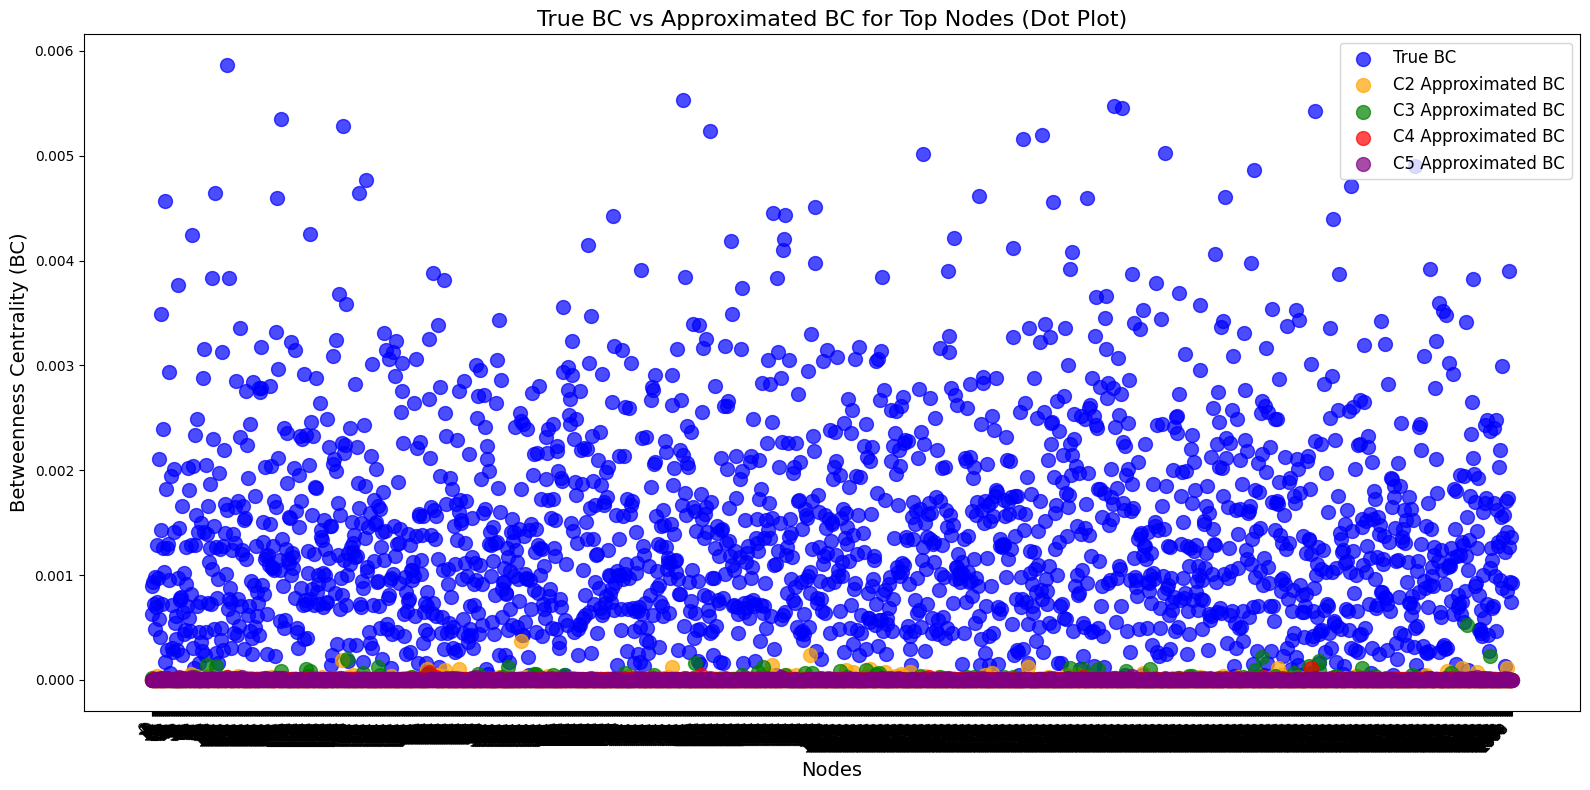

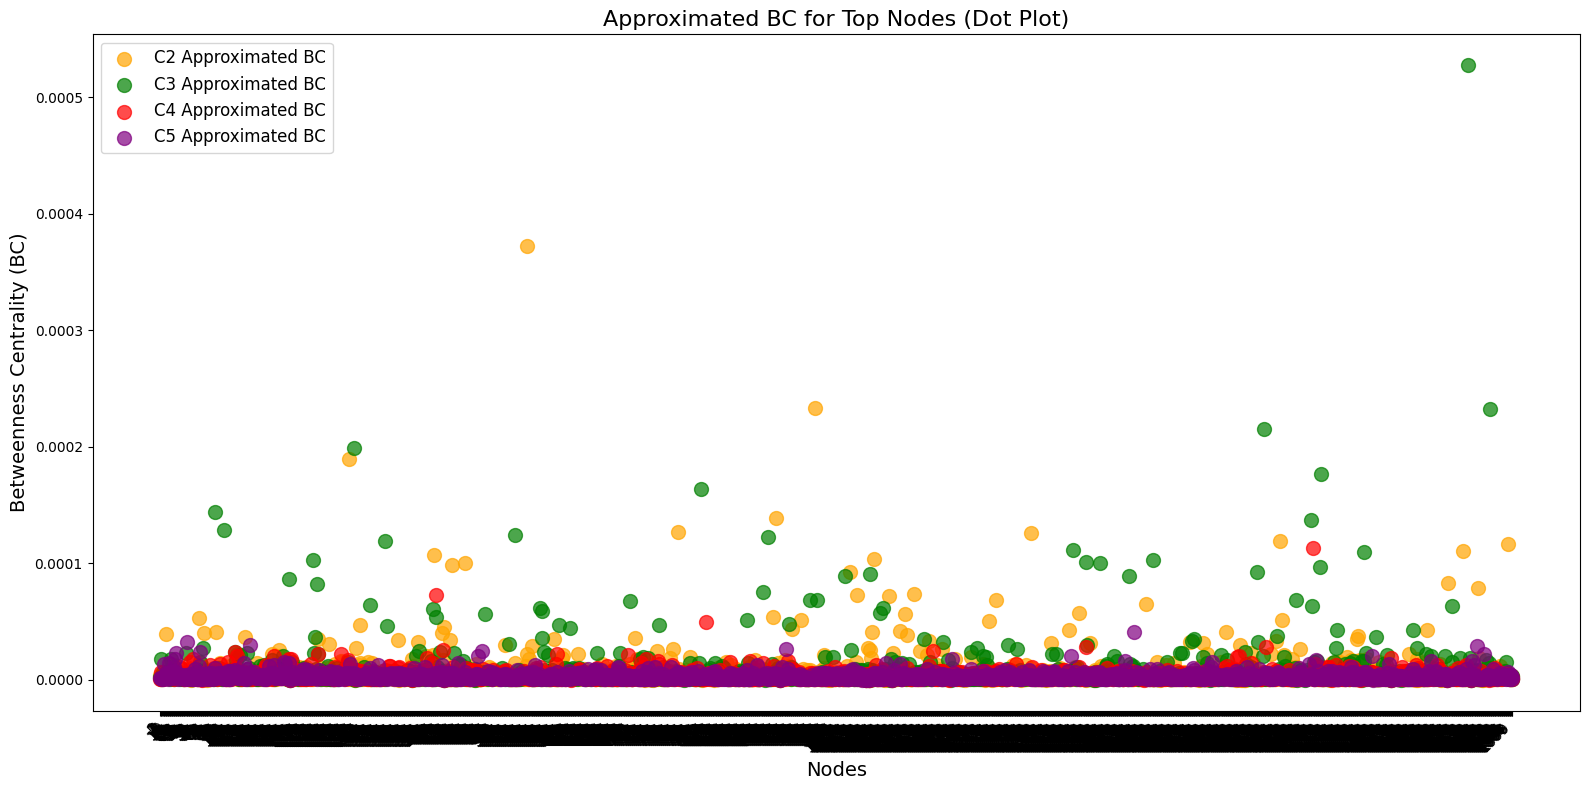

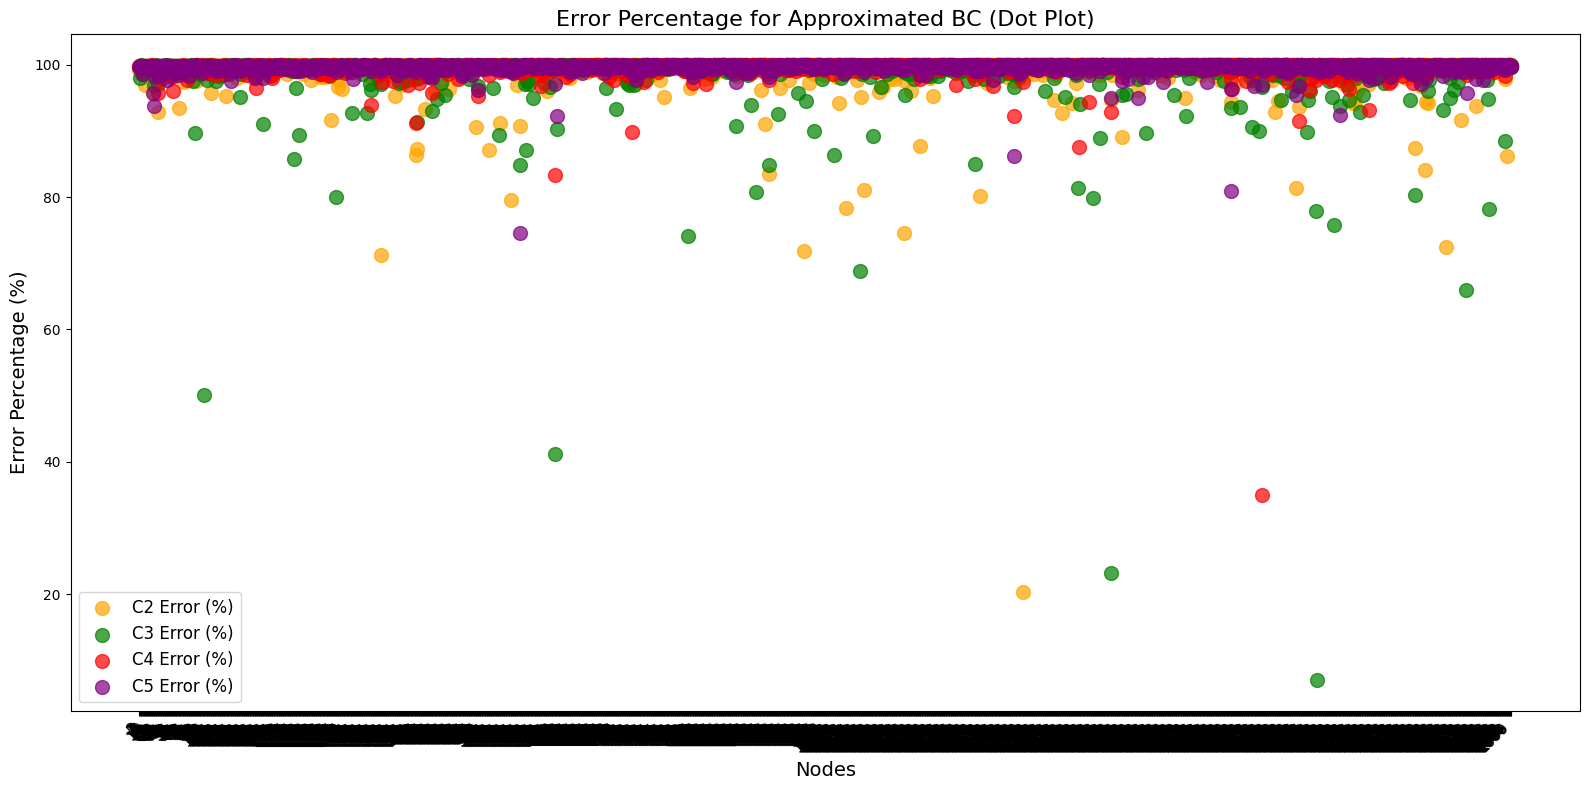

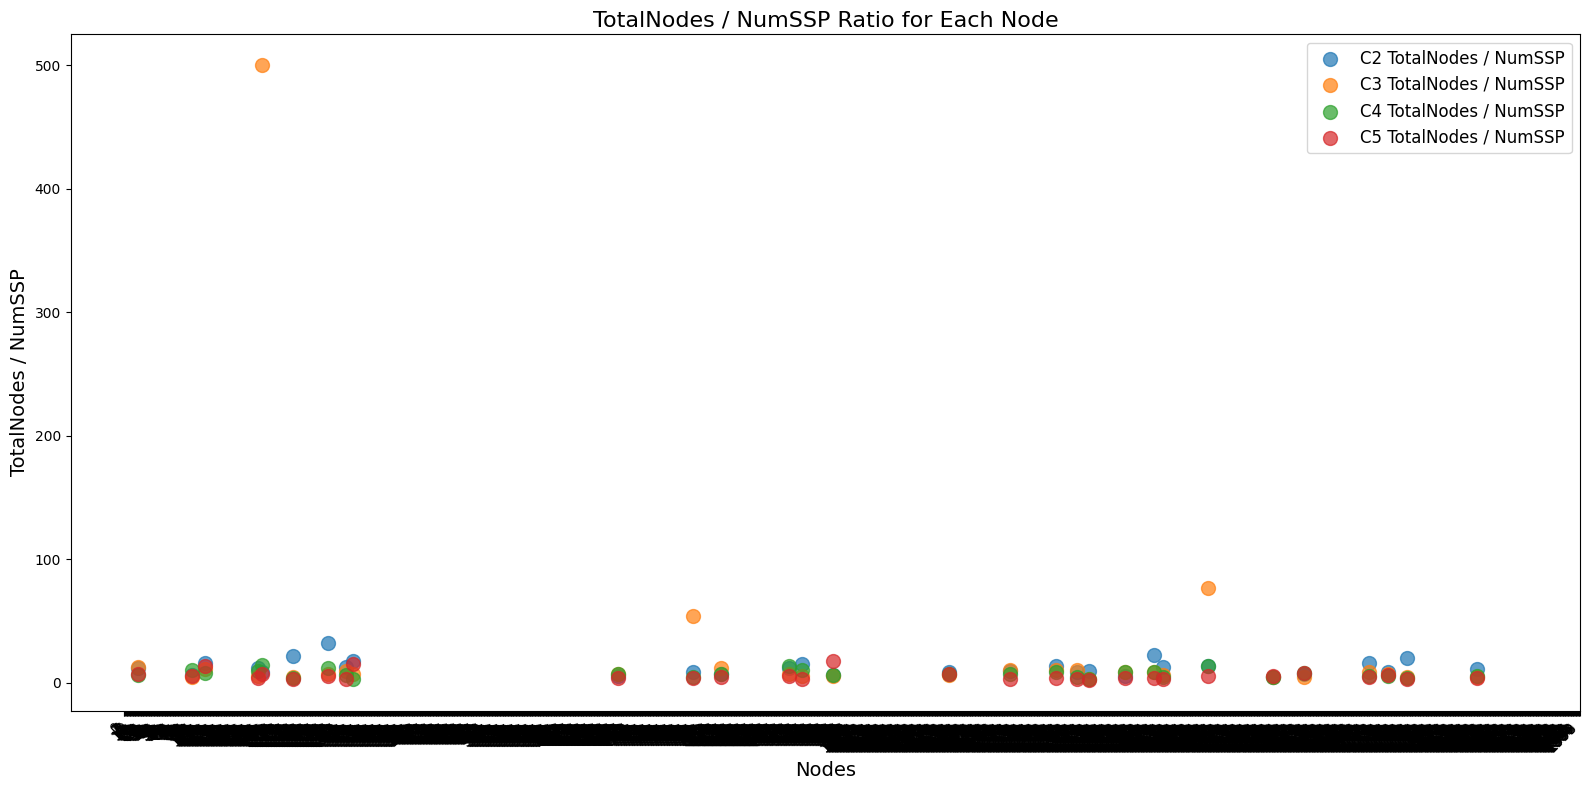

In [65]:
graph_name = 'Rand'
dataset = generate_bc_dataset(graph_name, False)

plot_bc_dotplot(dataset)
plot_approximated_bc_dotplot(dataset)
plot_error_percentage(dataset)
plot_totalnodes_to_numssp_ratio('Rand', dataset)

In [71]:

# Example Usage
graph_name = 'Rand'  # Replace with the graph you want to analyze
c_values = [2, 3, 4, 5]  # C values
dataset = generate_bc_dataset(graph_name, top_nodes_only=False)  # Generate full dataset for the graph

results_table = generate_graph_results_table(graph_name, c_values, dataset)

# Display the results table
print(results_table)

   t Avg. error (%) Avg. k/n (%)
0  2         99.34%        0.00%
1  3         99.16%        0.00%
2  4         99.58%        0.00%
3  5         99.65%        0.00%


Rand

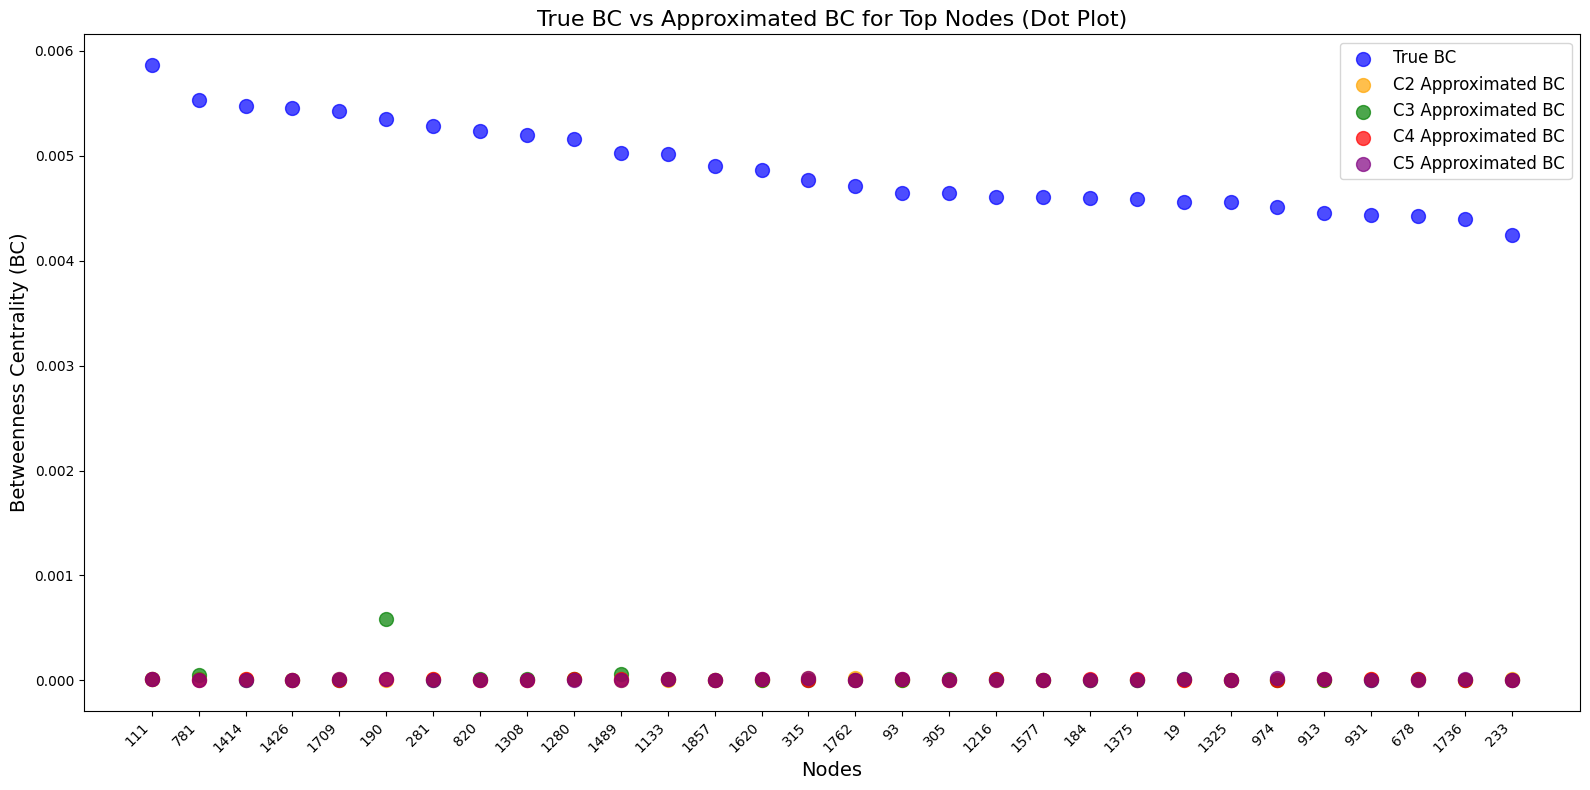

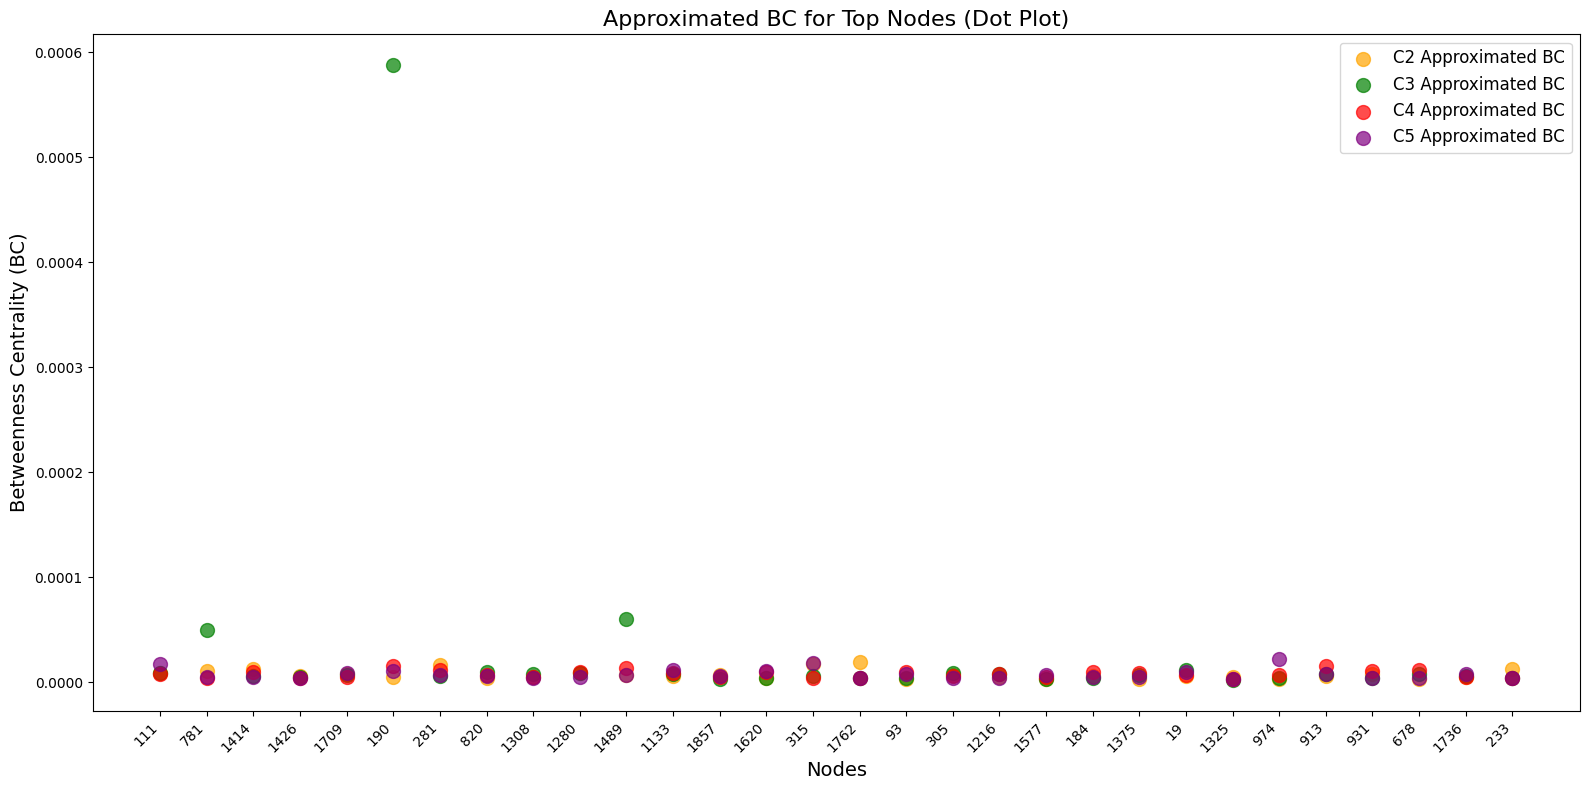

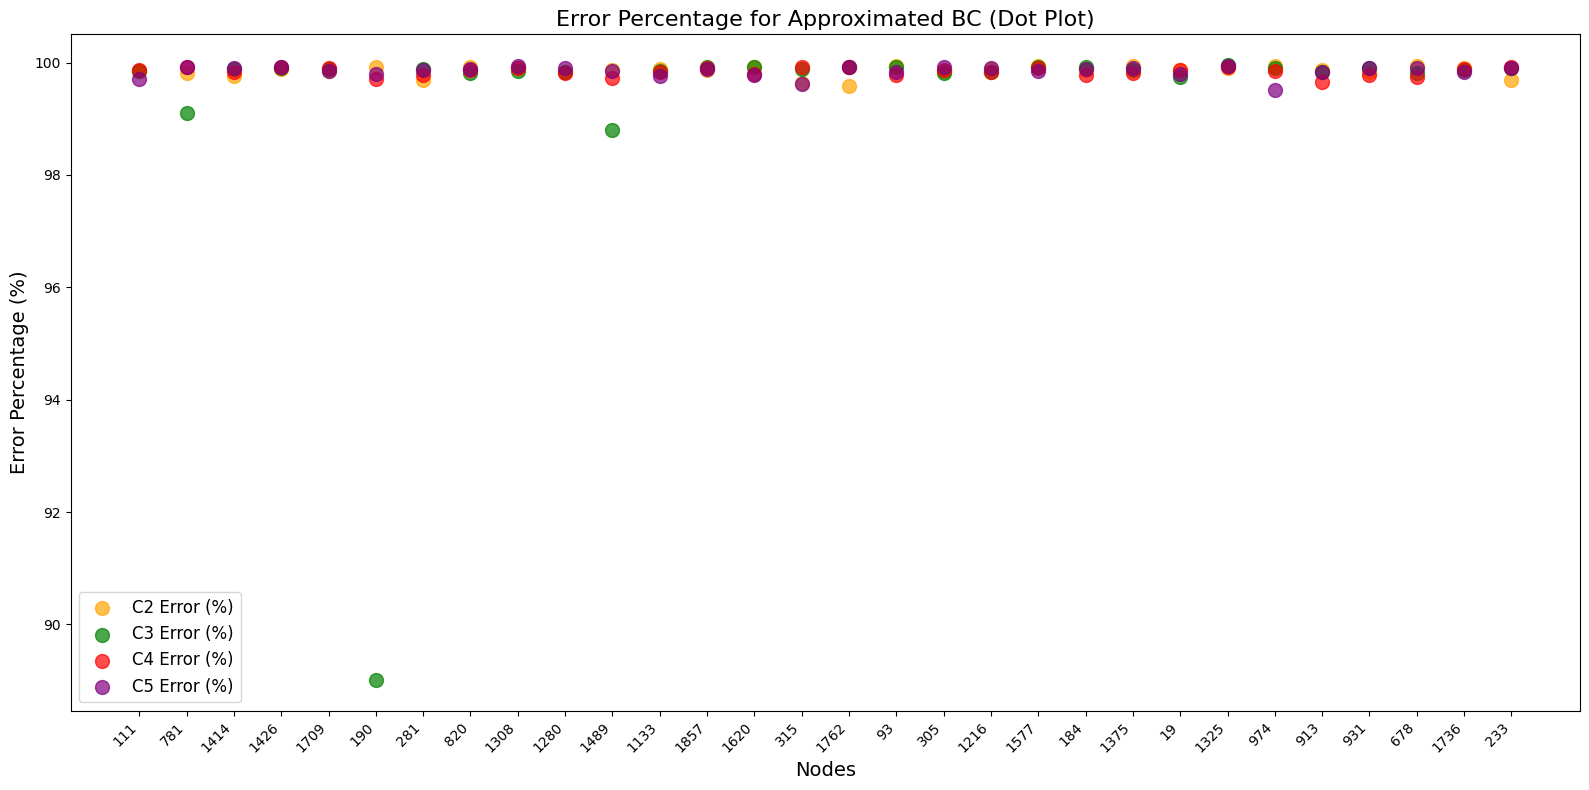

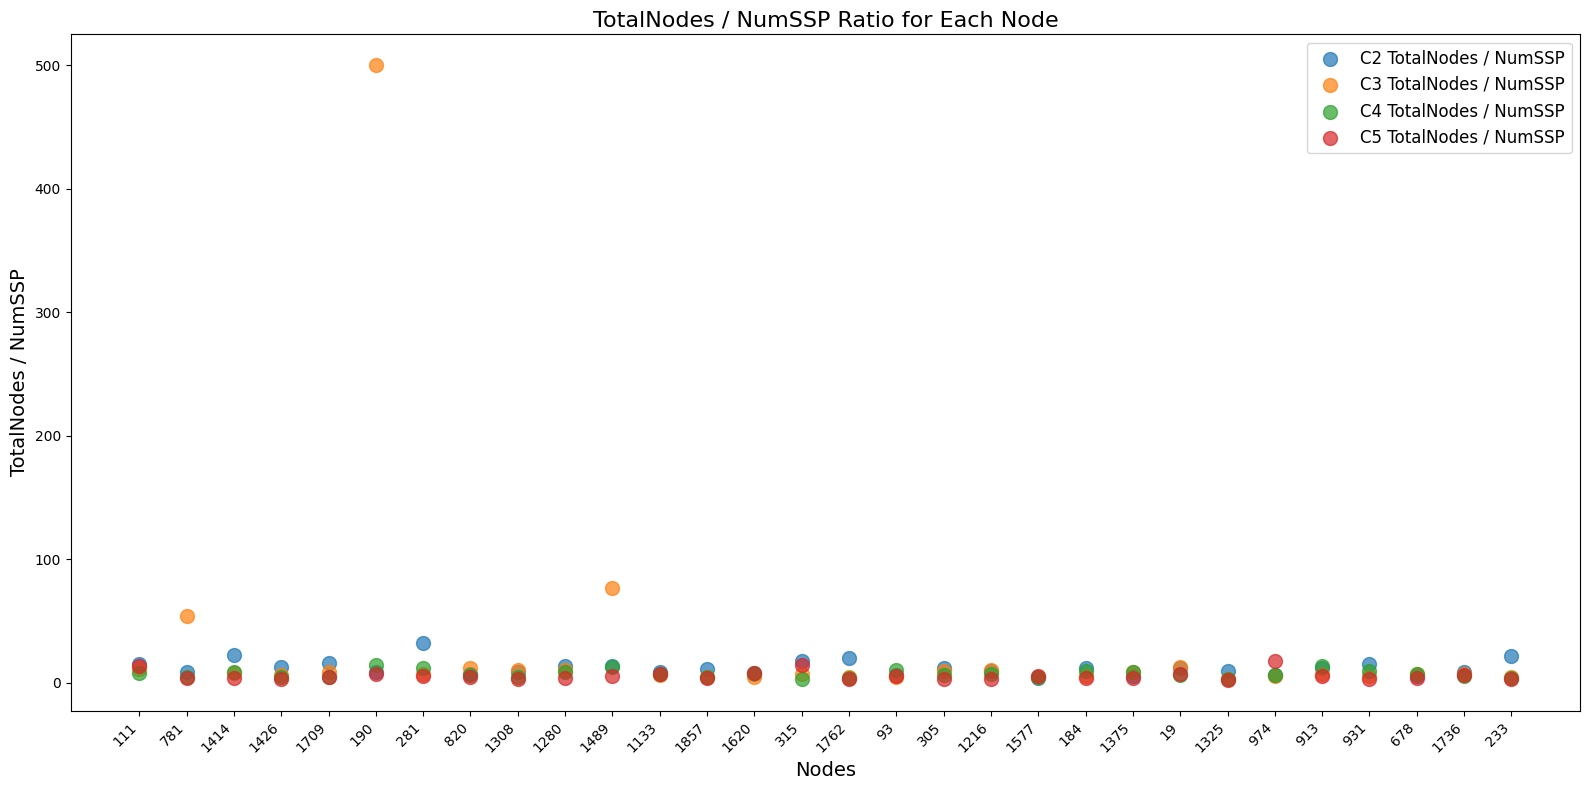

In [66]:
graph_name = 'Rand'
dataset = generate_bc_dataset(graph_name)

plot_bc_dotplot(dataset)
plot_approximated_bc_dotplot(dataset)
plot_error_percentage(dataset)
plot_totalnodes_to_numssp_ratio('Rand', dataset)

In [72]:

# Example Usage
graph_name = 'Rand'  # Replace with the graph you want to analyze
c_values = [2, 3, 4, 5]  # C values
dataset = generate_bc_dataset(graph_name)  # Generate full dataset for the graph

results_table = generate_graph_results_table(graph_name, c_values, dataset)

# Display the results table
print(results_table)

   t Avg. error (%) Avg. k/n (%)
0  2         99.85%        0.00%
1  3         99.45%        0.00%
2  4         99.84%        0.00%
3  5         99.85%        0.00%


Pref-attach

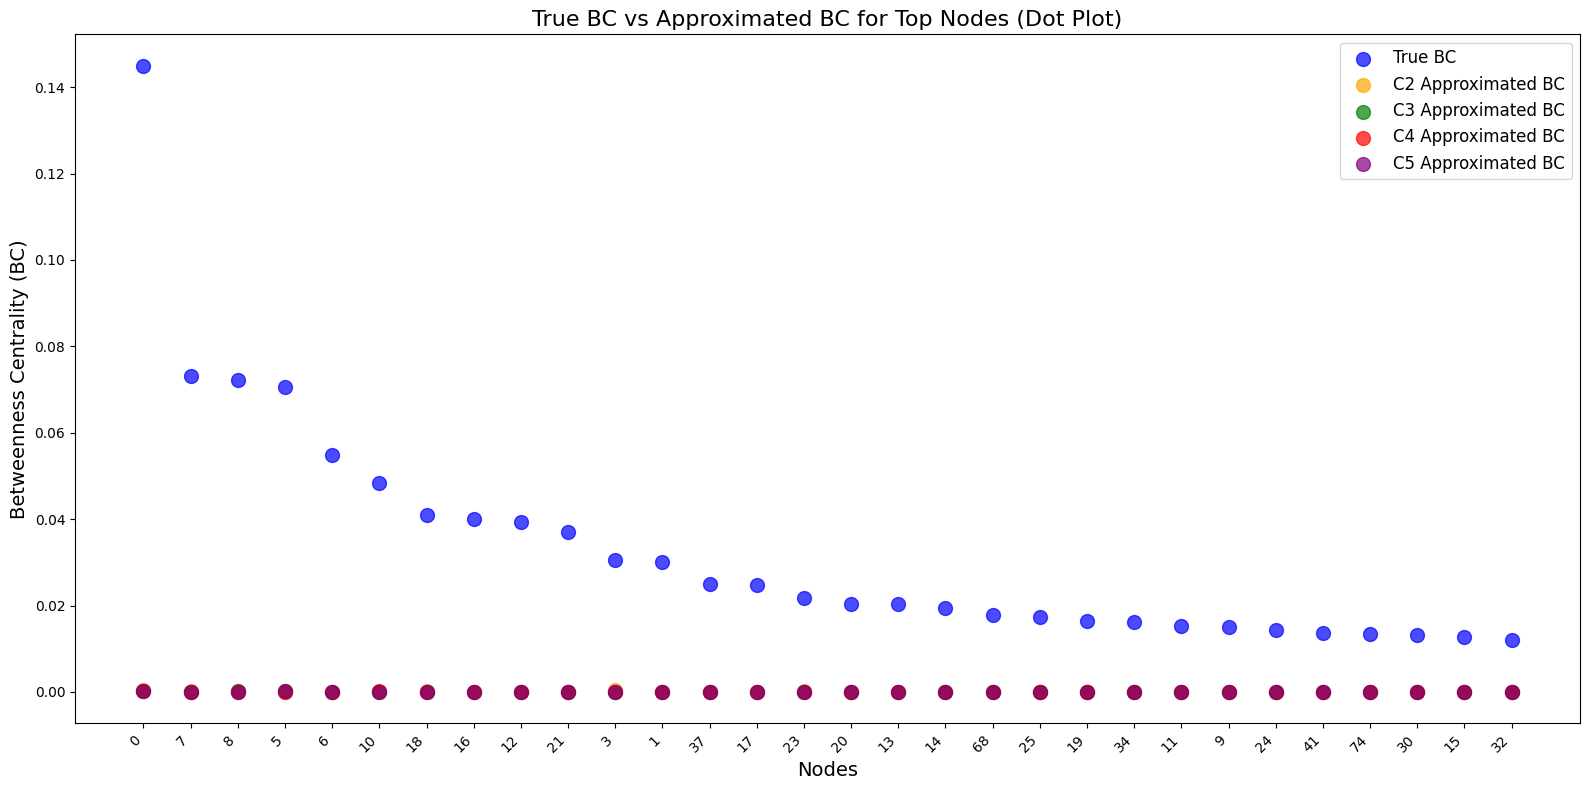

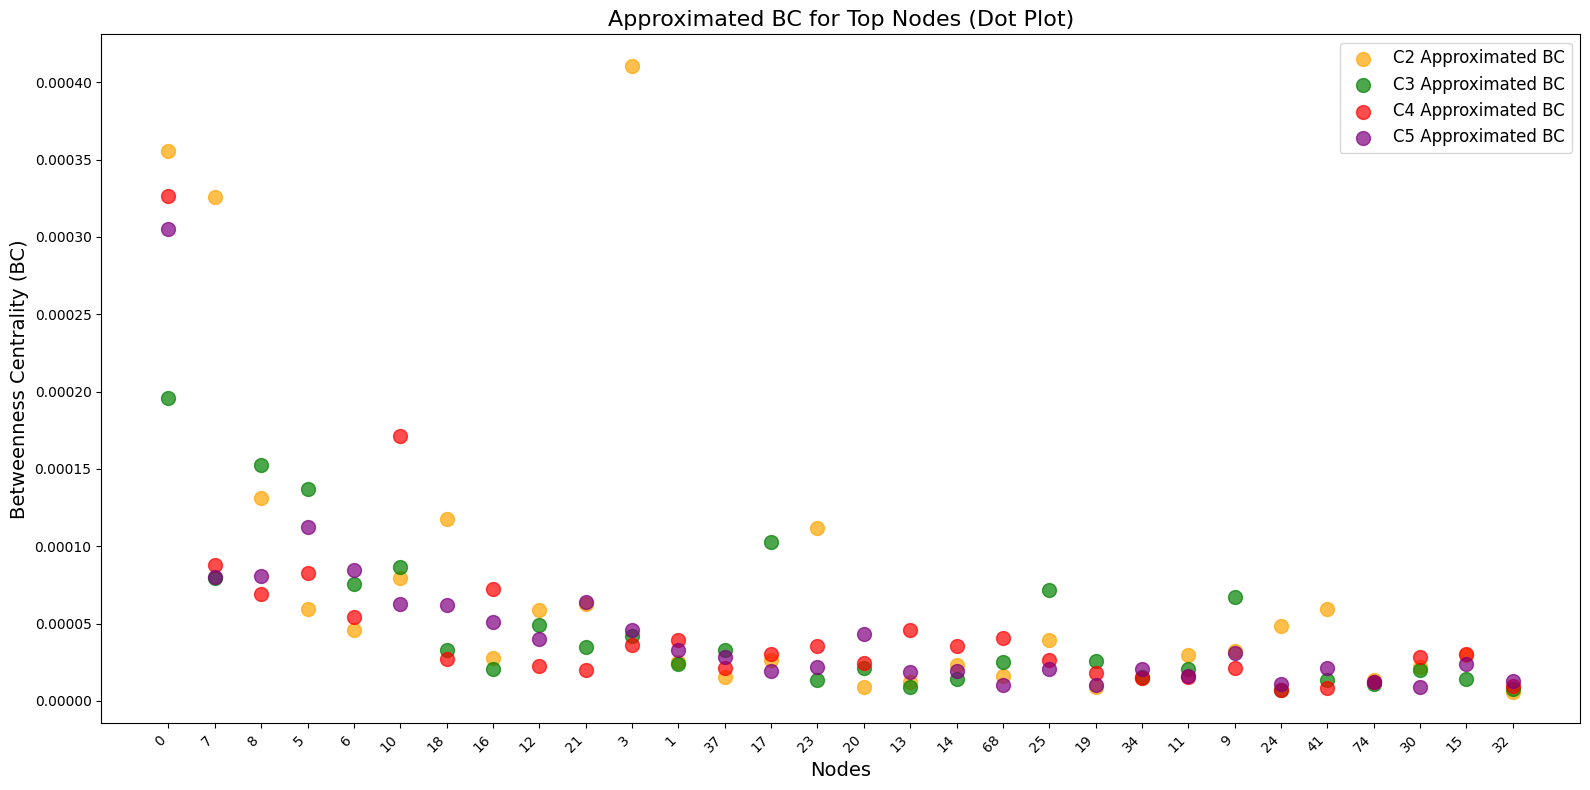

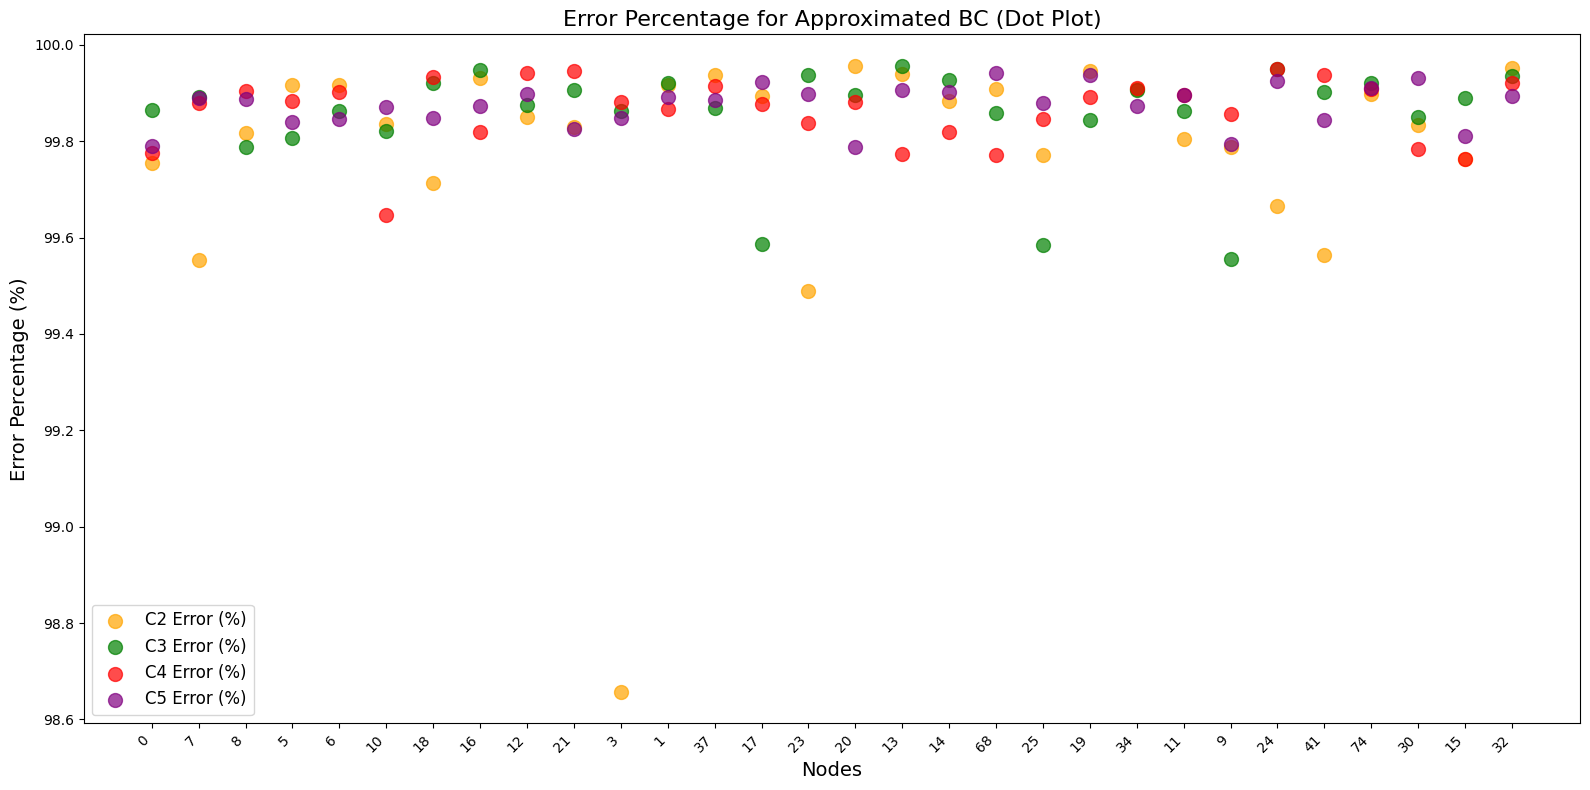

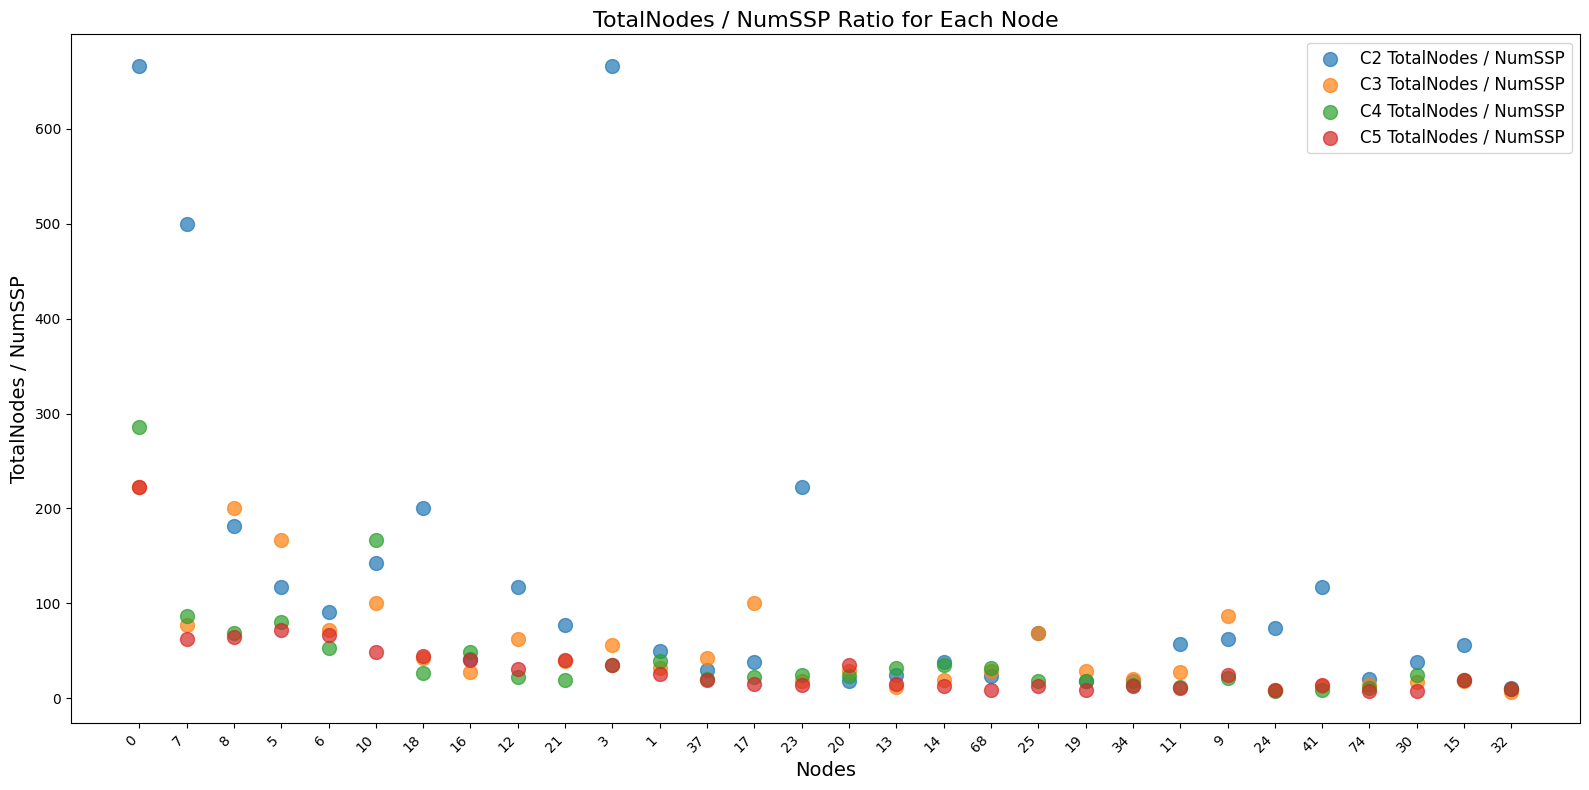

In [79]:
graph_name = 'Pref-attach'
dataset = generate_bc_dataset(graph_name)

plot_bc_dotplot(dataset)
plot_approximated_bc_dotplot(dataset)
plot_error_percentage(dataset)
plot_totalnodes_to_numssp_ratio(graph_name, dataset)

In [ ]:
# Example Usage
graph_name = 'Pref-attach'  # Replace with the graph you want to analyze
c_values = [2, 3, 4, 5]  # C values
dataset = generate_bc_dataset(graph_name)  # Generate full dataset for the graph

results_table = generate_graph_results_table(graph_name, c_values, dataset)

# Display the results table
print(results_table)

   t Avg. error (%) Avg. k/n (%)
0  2         99.79%        0.00%
1  3         99.86%        0.00%
2  4         99.86%        0.00%
3  5         99.88%        0.00%


Carwl

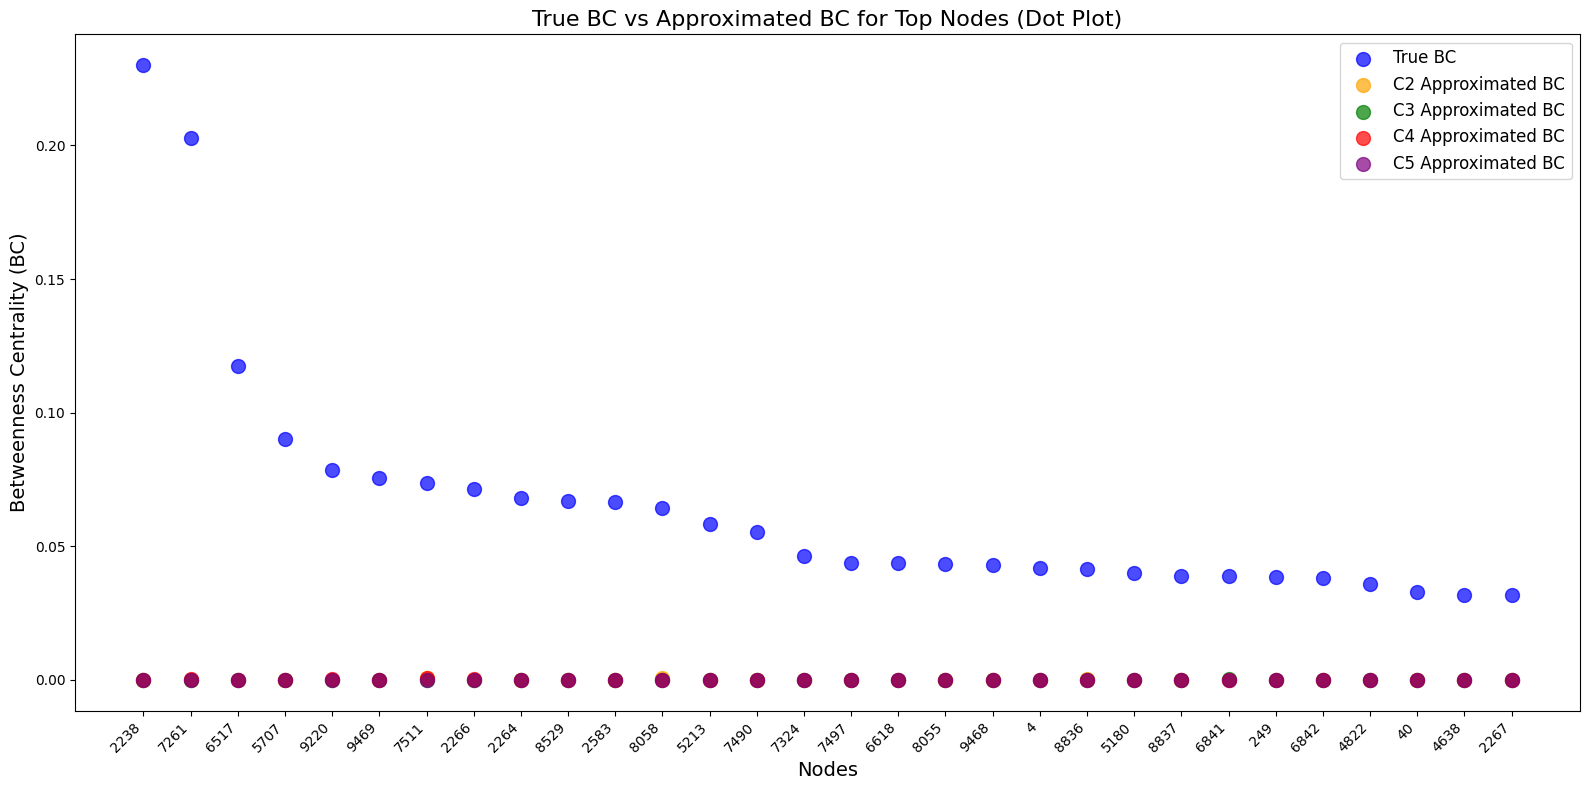

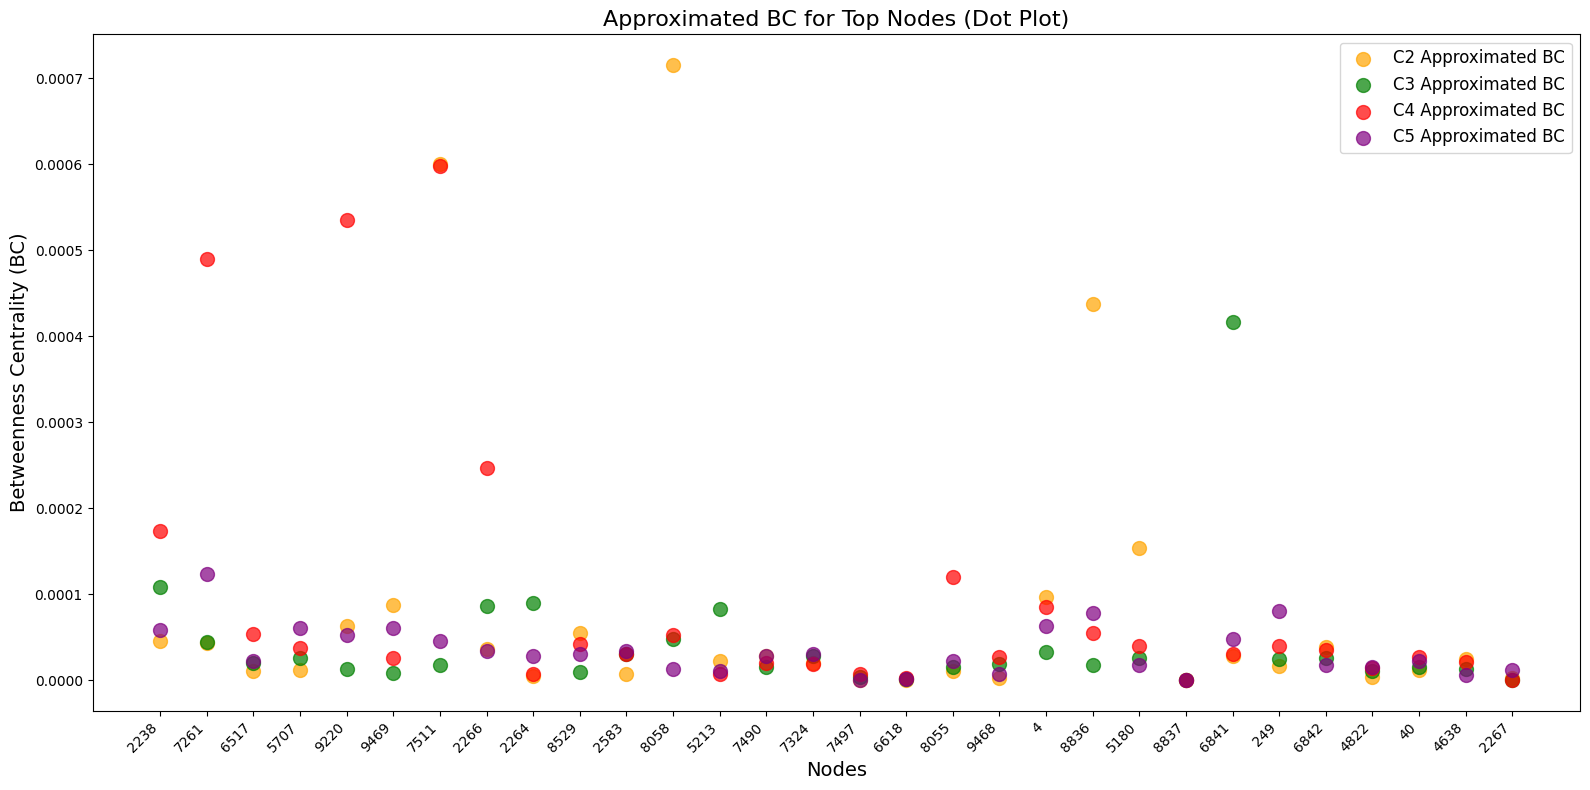

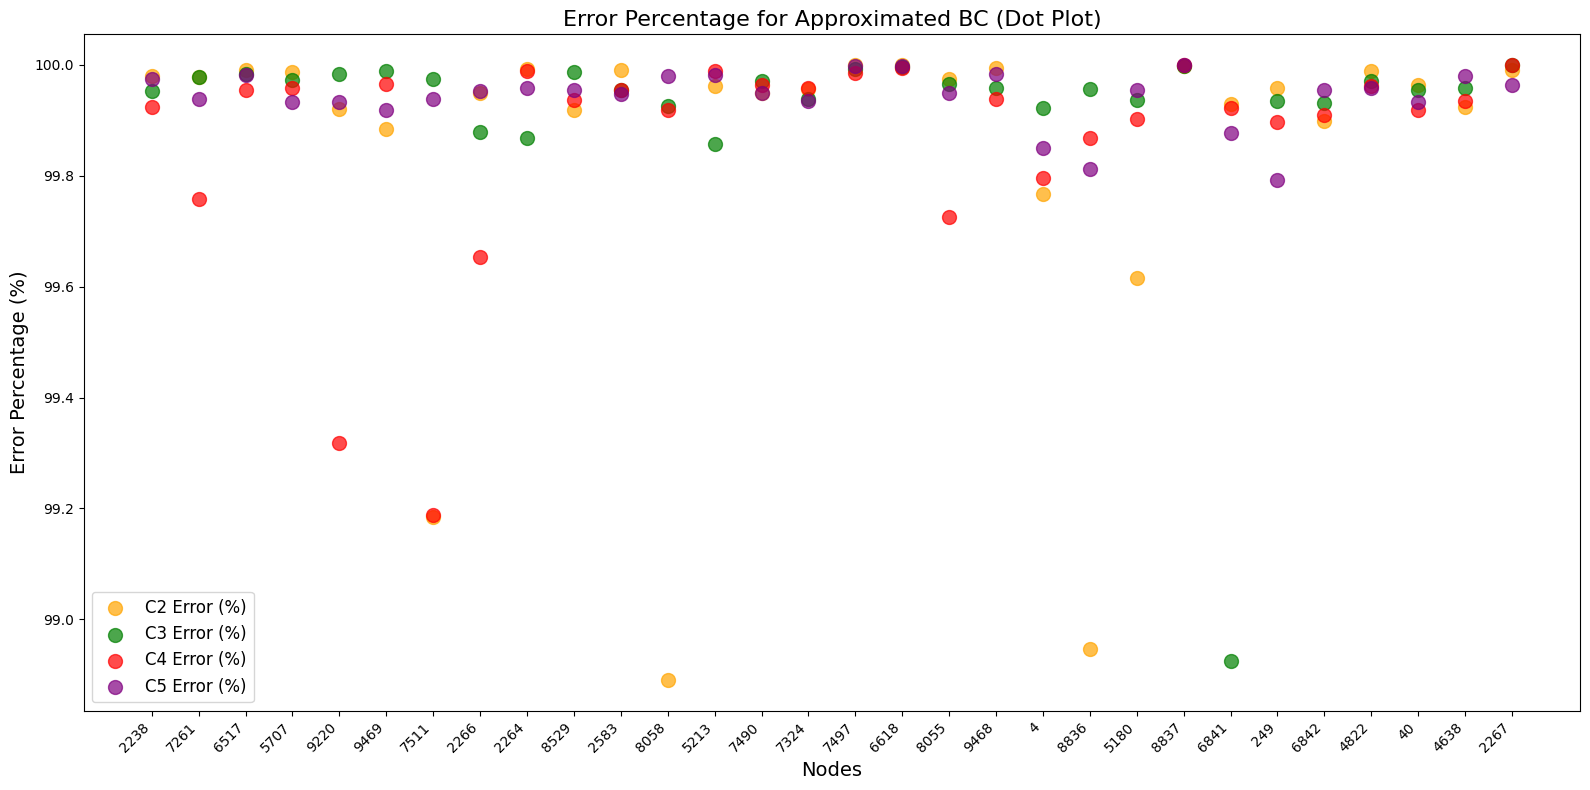

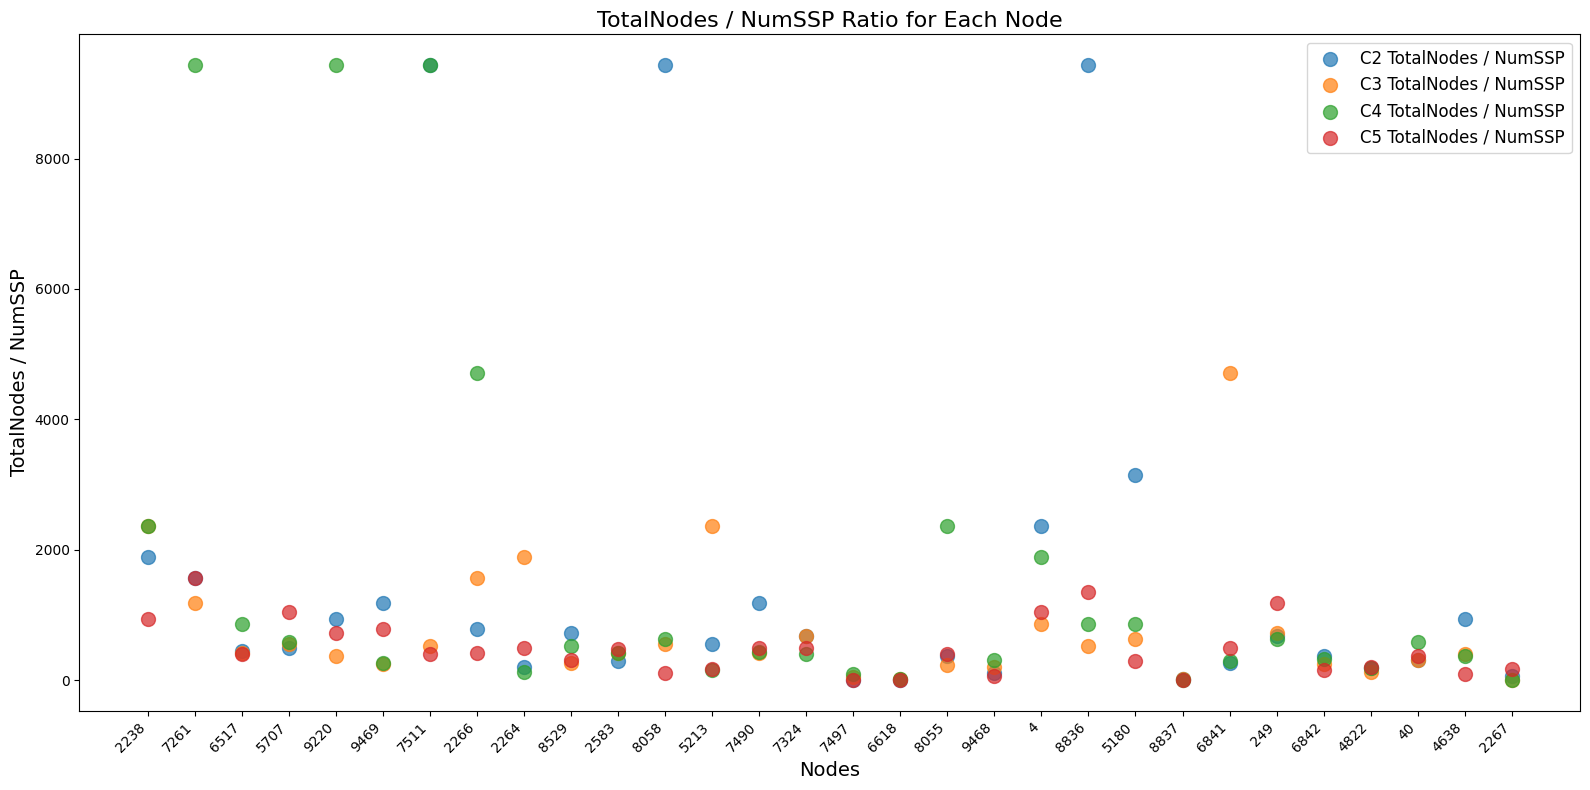

In [80]:
graph_name = 'Crawl'
dataset = generate_bc_dataset(graph_name)

plot_bc_dotplot(dataset)
plot_approximated_bc_dotplot(dataset)
plot_error_percentage(dataset)
plot_totalnodes_to_numssp_ratio(graph_name, dataset)

In [75]:

# Example Usage
graph_name = 'Crawl'  # Replace with the graph you want to analyze
c_values = [2, 3, 4, 5]  # C values
dataset = generate_bc_dataset(graph_name)  # Generate full dataset for the graph

results_table = generate_graph_results_table(graph_name, c_values, dataset)

# Display the results table
print(results_table)

   t Avg. error (%) Avg. k/n (%)
0  2         99.85%        0.00%
1  3         99.92%        0.00%
2  4         99.87%        0.00%
3  5         99.94%        0.00%


Cite

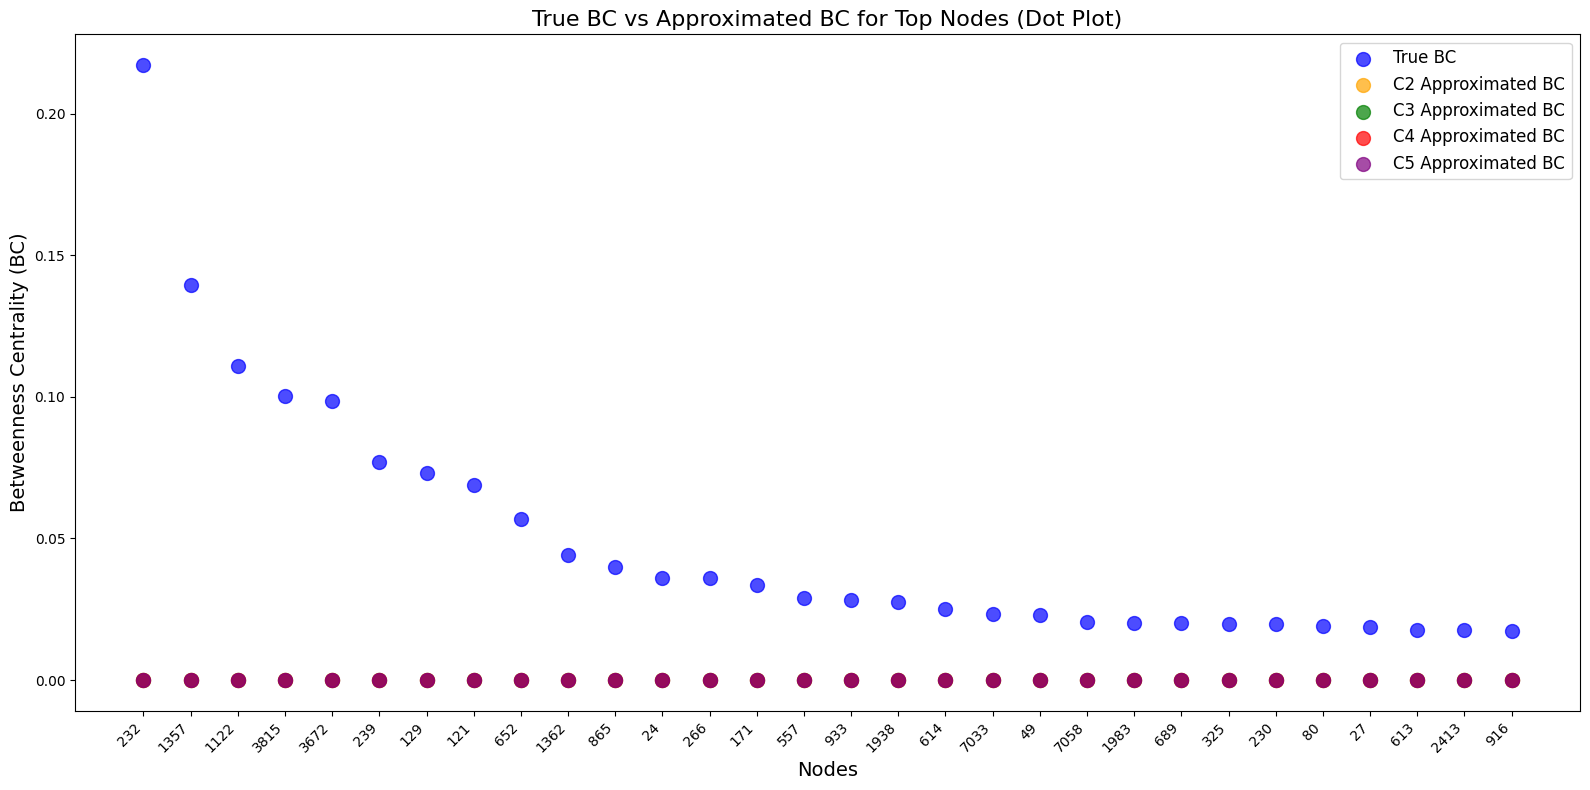

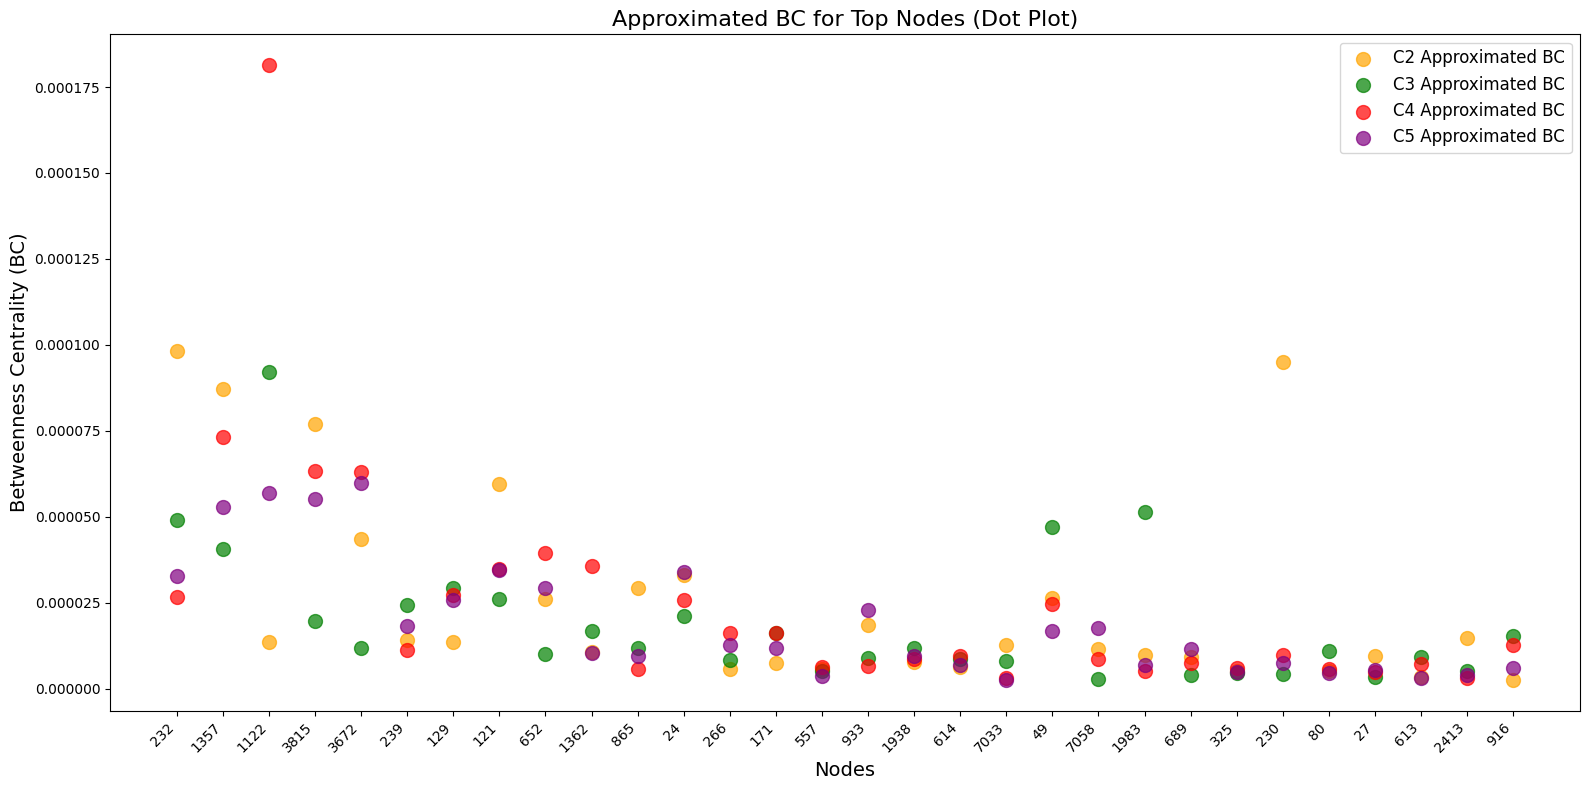

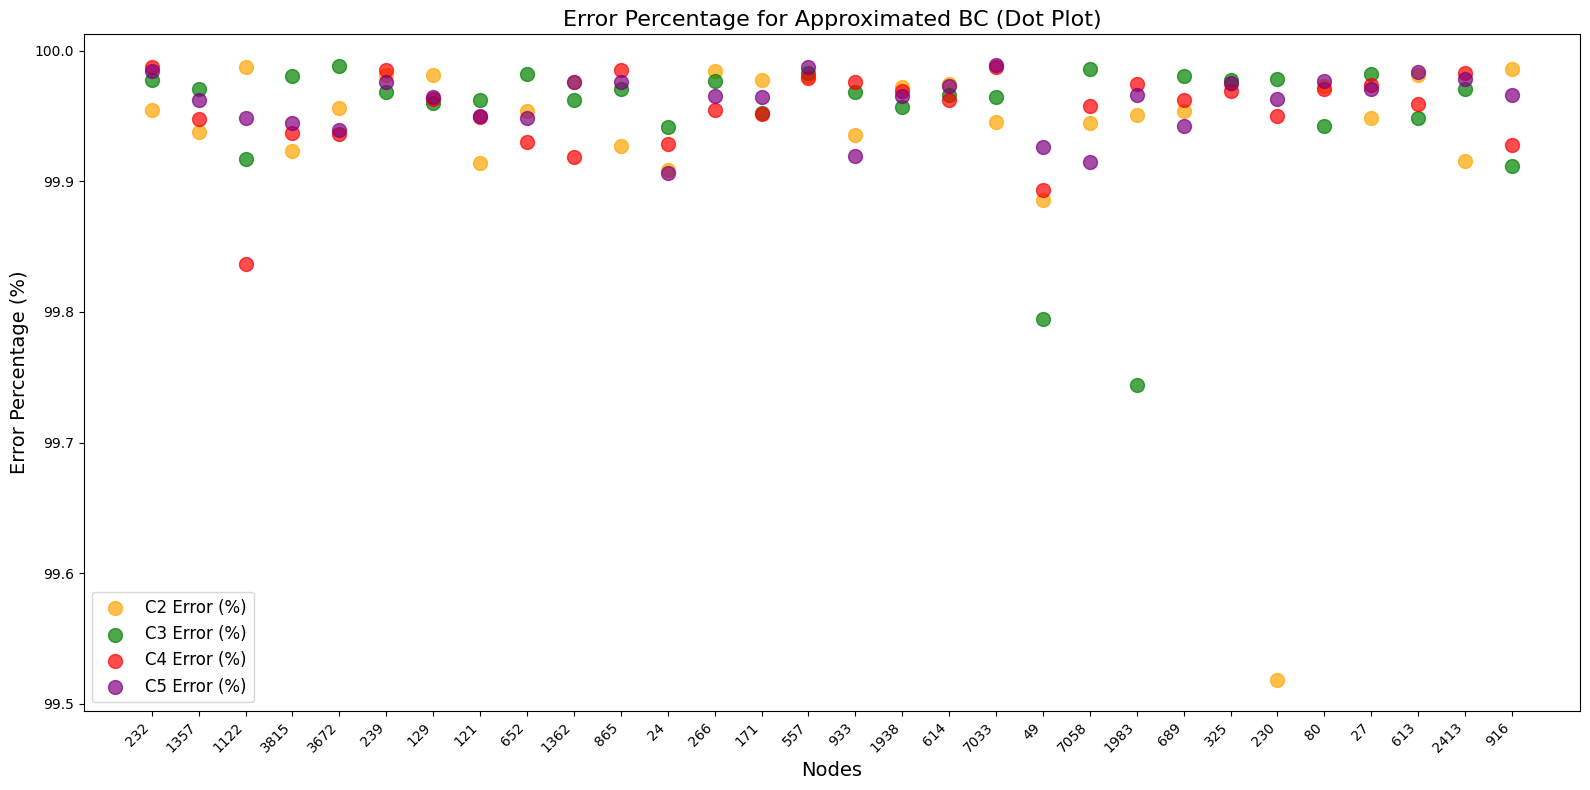

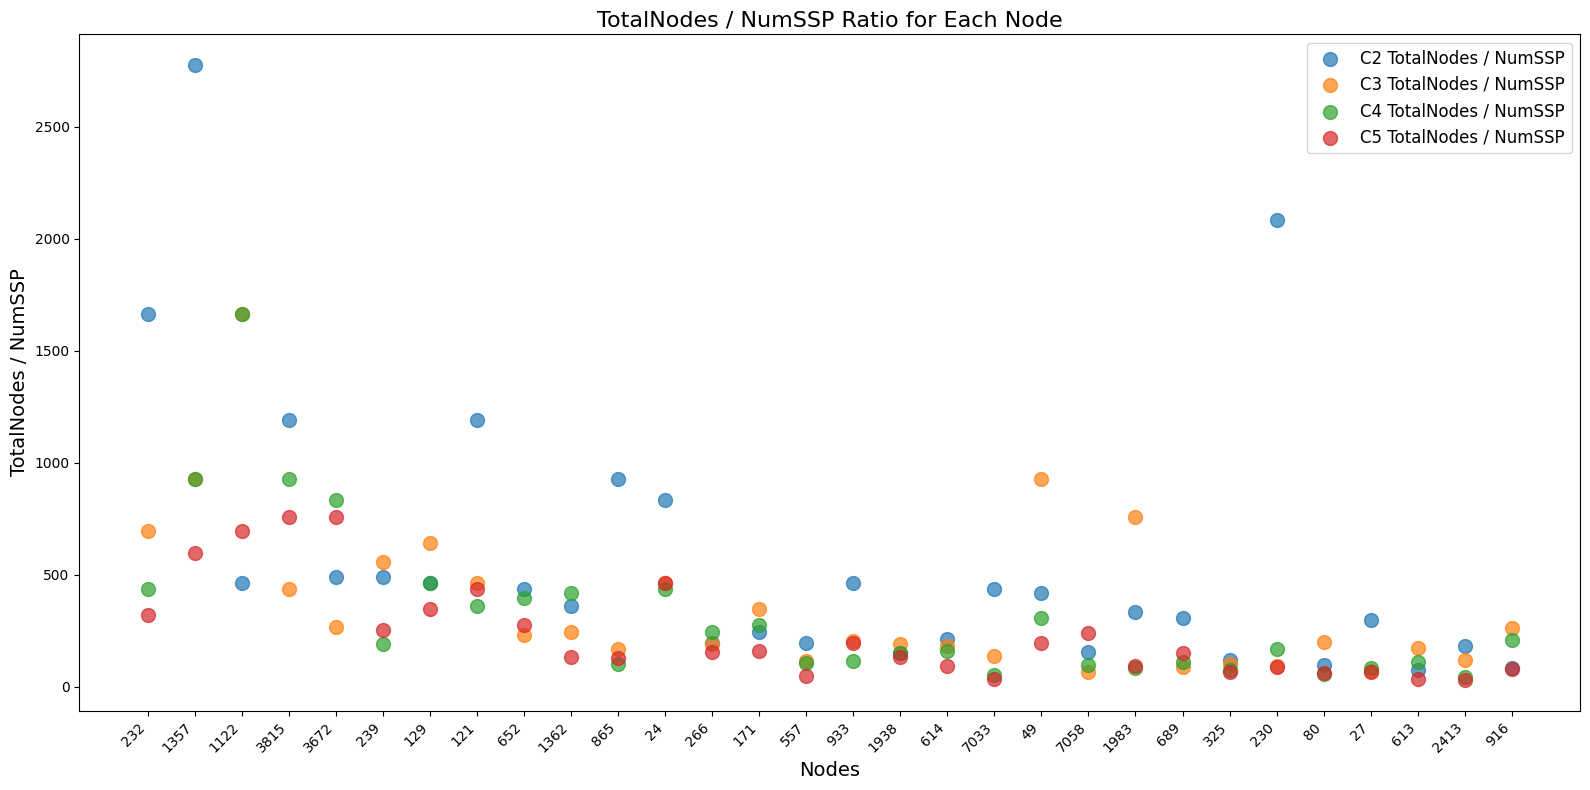

In [81]:
graph_name = 'Cite'
dataset = generate_bc_dataset(graph_name)

plot_bc_dotplot(dataset)
plot_approximated_bc_dotplot(dataset)
plot_error_percentage(dataset)
plot_totalnodes_to_numssp_ratio(graph_name, dataset)

In [76]:

# Example Usage
graph_name = 'Cite'  # Replace with the graph you want to analyze
c_values = [2, 3, 4, 5]  # C values
dataset = generate_bc_dataset(graph_name)  # Generate full dataset for the graph

results_table = generate_graph_results_table(graph_name, c_values, dataset)

# Display the results table
print(results_table)

   t Avg. error (%) Avg. k/n (%)
0  2         99.94%        0.00%
1  3         99.95%        0.00%
2  4         99.95%        0.00%
3  5         99.96%        0.00%


Road

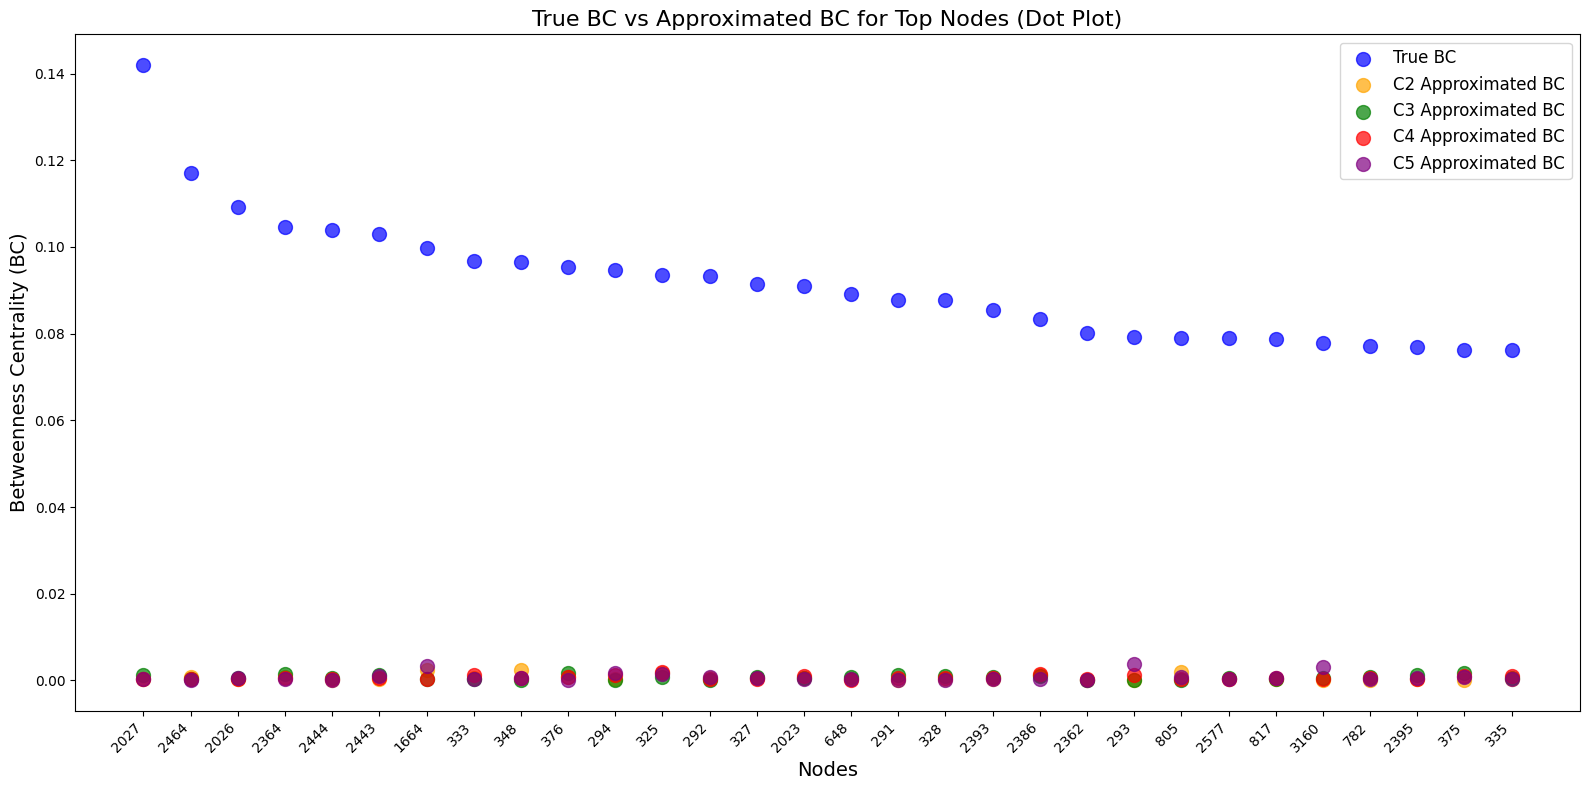

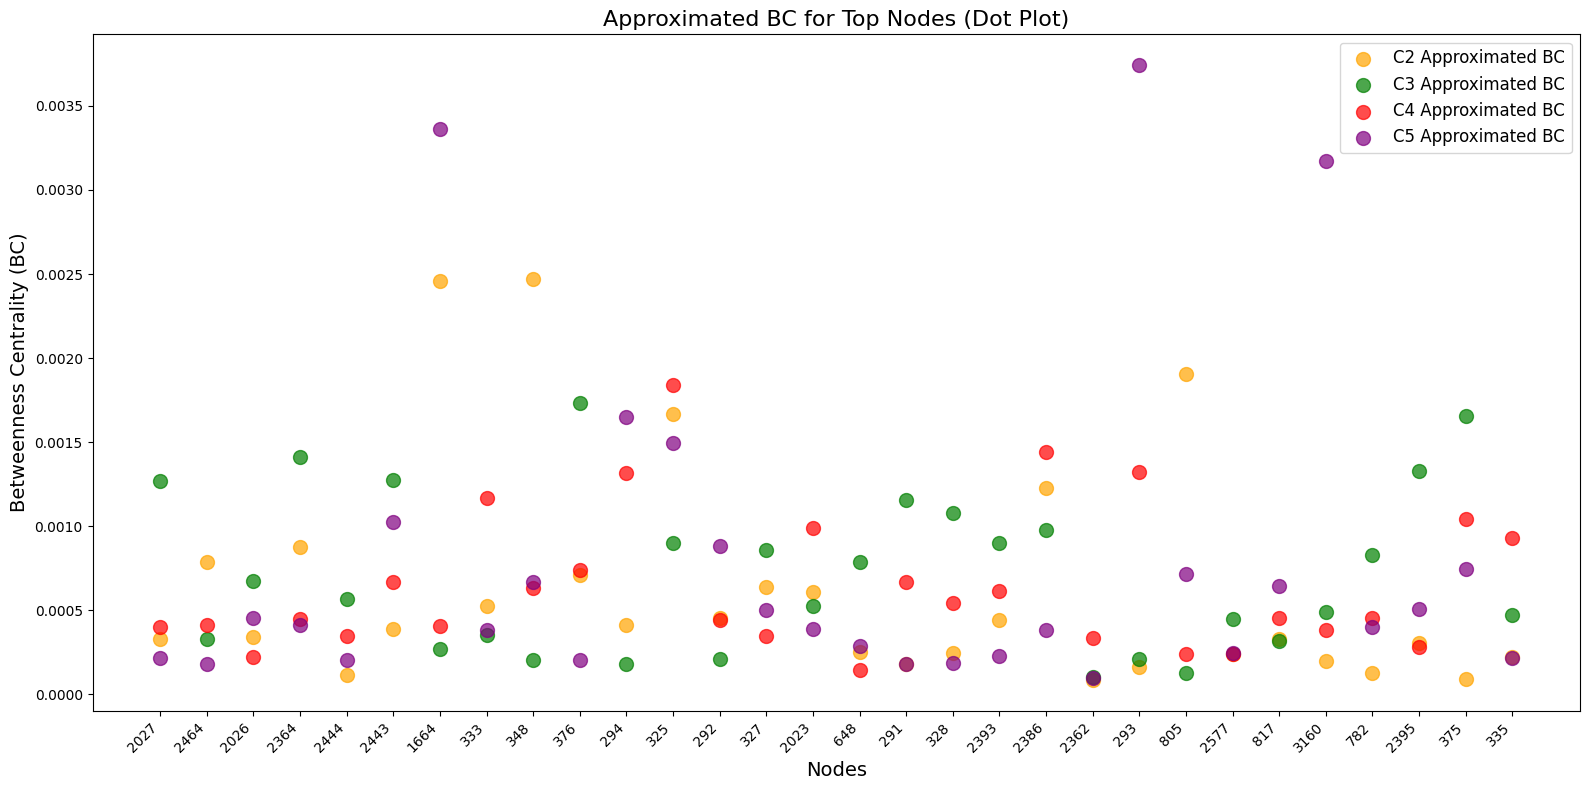

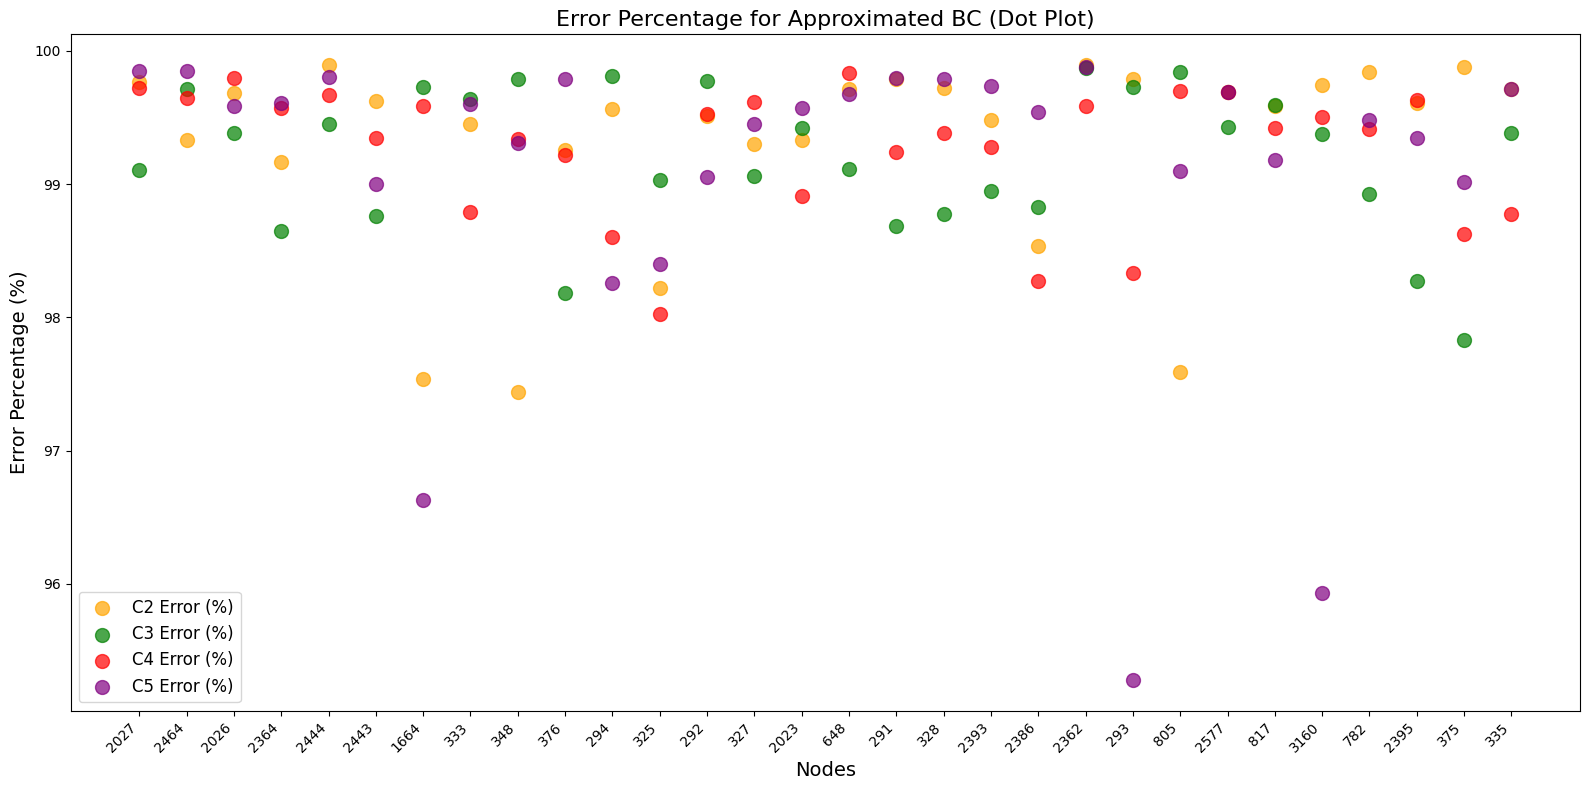

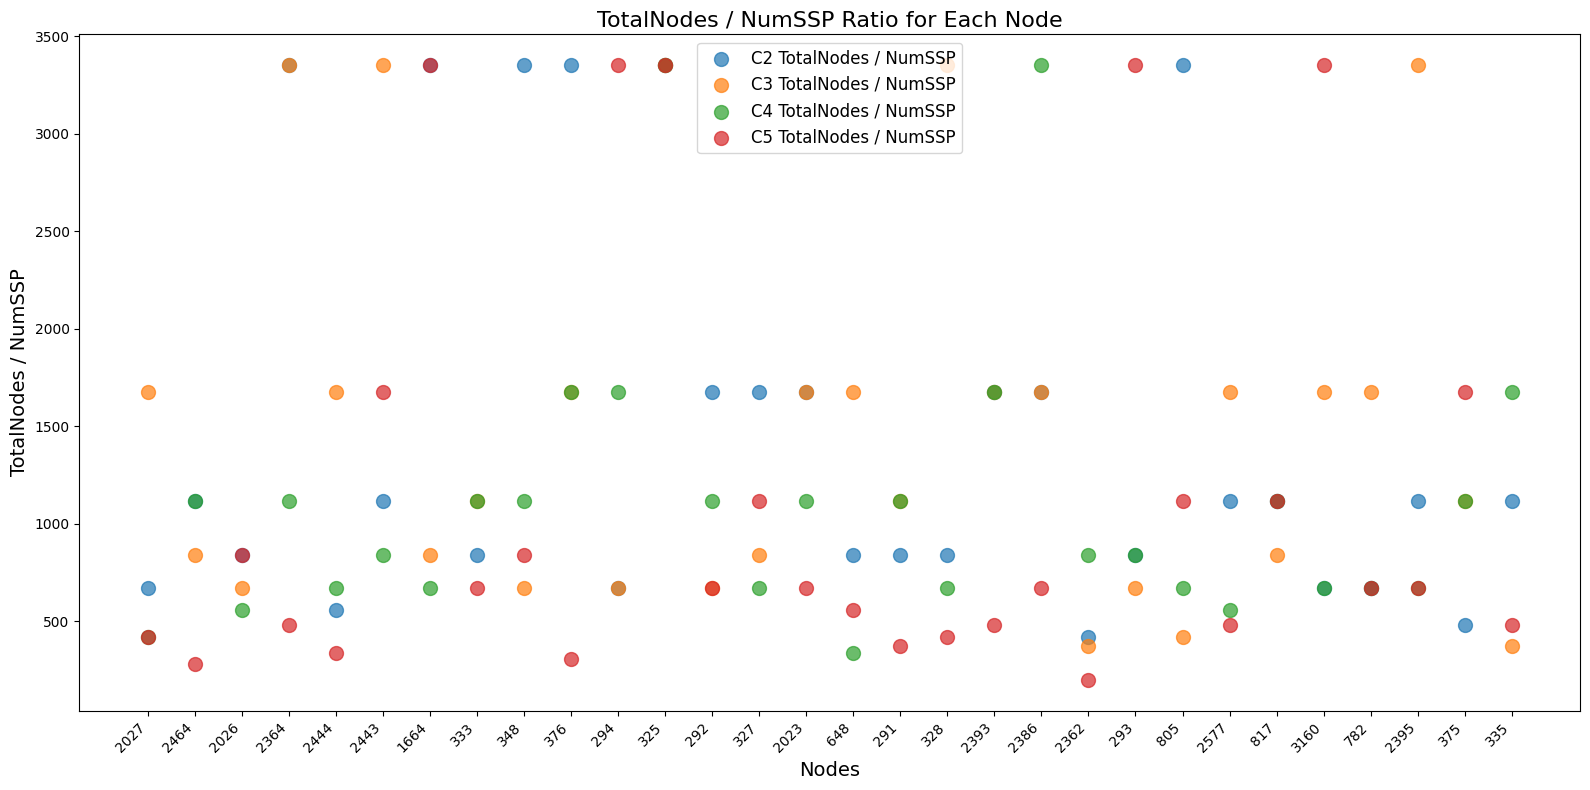

In [82]:
graph_name = 'Road'
dataset = generate_bc_dataset(graph_name)

plot_bc_dotplot(dataset)
plot_approximated_bc_dotplot(dataset)
plot_error_percentage(dataset)
plot_totalnodes_to_numssp_ratio(graph_name, dataset)

In [77]:

# Example Usage
graph_name = 'Road'  # Replace with the graph you want to analyze
c_values = [2, 3, 4, 5]  # C values
dataset = generate_bc_dataset(graph_name)  # Generate full dataset for the graph

results_table = generate_graph_results_table(graph_name, c_values, dataset)

# Display the results table
print(results_table)

   t Avg. error (%) Avg. k/n (%)
0  2         99.32%        0.00%
1  3         99.20%        0.00%
2  4         99.27%        0.00%
3  5         99.10%        0.00%
